<b><font color="SteelBlue" size="+3">Anticipez les besoins en consommation de bâtiments <br>
Prediction GHG Emissions</font></b>

Ce notebook est la suite du notebook d'exploration des données Deveau_Estelle_1_notebook_exploratoire_022024

# Introduction

## Imports

In [1]:
# Chargement des librairies
# Builtin
import os

# Data
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# ML
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.dummy import DummyRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import cross_validate
import time
from scipy.stats import uniform
from sklearn.inspection import permutation_importance
from scipy.stats import uniform, loguniform
import shap

# hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


## Data

In [2]:
os.listdir()

['.ipynb_checkpoints',
 'data',
 'Deveau_Estelle_1_notebook_exploratoire_022024.ipynb',
 'Deveau_Estelle_2_notebook_prediction_EnergyUse_022024.ipynb',
 'Deveau_Estelle_3_notebook_prediction_GHGEmissions_022024.ipynb',
 'Map_of_Seattle,_divided_by_districts.png',
 'OC_projet4.pptx',
 'svg',
 '~$OC_projet4.pptx']

In [3]:
os.listdir("data/cleaned/")

['df_cleaned.csv']

In [4]:
path     = "./data/cleaned/"
filename = "df_cleaned.csv"

In [5]:
df = pd.read_csv(path + filename)
df.head()

NumberofBuildings  NumberofFloors  PropertyGFATotal  ENERGYSTARScore  \
0                1.0              12             88434             60.0   
1                1.0              11            103566             61.0   
2                1.0              41            956110             43.0   
3                1.0              10             61320             56.0   
4                1.0              11             83008             27.0   

   SiteEnergyUseWN(kBtu)  TotalGHGEmissions  BuildingAge  \
0              7456910.0             249.98           89   
1              8664479.0             295.86           20   
2             73937112.0            2089.28           47   
3              6946800.5             286.43           90   
4              6062767.5             176.14           90   

   NumberOfPropertyUseTypes  SteamUse_pct  Electricity_pct  ...  \
0                         1     26.872820        52.917723  ...   
1                         3      0.000000        37.426959  ...   
2                         1     29.168781        66.984851  ...   
3                         1     31.877211        39.858983  ...   
4                         1      0.000000        46.368511  ...   

   GFA_Commerce_detail_pct  GFA_Bureau_pct  GFA_Entrepot_nr_pct  \
0                      0.0             0.0                  0.0   
1                      0.0             0.0                  0.0   
2                      0.0             0.0                  0.0   
3                      0.0             0.0                  0.0   
4                      0.0             0.0                  0.0   

   GFA_Sante_pct  GFA_Bureau_specialise_pct  \
0            0.0                        0.0   
1            0.0                        0.0   
2            0.0                        0.0   
3            0.0                        0.0   
4            0.0                        0.0   

   GFA_Restauration_Divertissement_pct  GFA_Science_Technologie_pct  \
0                             0.000000                          0.0   
1                             3.896148                          0.0   
2                             0.000000                          0.0   
3                             0.000000                          0.0   
4                             0.000000                          0.0   

   GFA_Supermarche_pct  Log_TotalGHGEmissions  Log_SiteEnergyUseWN  
0                  0.0               5.521381            15.824652  
1                  0.0               5.689886            15.974742  
2                  0.0               7.644575            18.118725  
3                  0.0               5.657494            15.753792  
4                  0.0               5.171279            15.617677  

[5 rows x 27 columns]

In [6]:
# Modification des affichages de colonnes, lignes et largeurs de colonnes pour avoir un maximum d'information
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [7]:
df.shape

(1135, 27)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1135 entries, 0 to 1134
Data columns (total 27 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   NumberofBuildings                       1135 non-null   float64
 1   NumberofFloors                          1135 non-null   int64  
 2   PropertyGFATotal                        1135 non-null   int64  
 3   ENERGYSTARScore                         725 non-null    float64
 4   SiteEnergyUseWN(kBtu)                   1135 non-null   float64
 5   TotalGHGEmissions                       1135 non-null   float64
 6   BuildingAge                             1135 non-null   int64  
 7   NumberOfPropertyUseTypes                1135 non-null   int64  
 8   SteamUse_pct                            1135 non-null   float64
 9   Electricity_pct                         1135 non-null   float64
 10  NaturalGas_pct                          1135 non-null   floa

In [9]:
df.describe()

NumberofBuildings  NumberofFloors  PropertyGFATotal  ENERGYSTARScore  \
count        1135.000000     1135.000000      1.135000e+03       725.000000   
mean            1.138326        3.954185      1.041771e+05        63.257931   
std             1.254720        6.194782      1.957131e+05        28.022159   
min             1.000000        1.000000      1.128500e+04         1.000000   
25%             1.000000        1.000000      2.774000e+04        44.000000   
50%             1.000000        2.000000      4.447600e+04        70.000000   
75%             1.000000        4.000000      8.977500e+04        87.000000   
max            27.000000       76.000000      2.200000e+06       100.000000   

       SiteEnergyUseWN(kBtu)  TotalGHGEmissions  BuildingAge  \
count           1.135000e+03        1135.000000  1135.000000   
mean            7.195675e+06         155.616855    57.340088   
std             1.859154e+07         545.543551    32.096206   
min             5.811420e+04           0.400000     1.000000   
25%             1.220033e+06          19.210000    33.000000   
50%             2.472120e+06          46.490000    54.000000   
75%             6.362965e+06         127.850000    88.000000   
max             2.959299e+08       12307.160000   116.000000   

       NumberOfPropertyUseTypes  SteamUse_pct  Electricity_pct  \
count               1135.000000   1135.000000      1135.000000   
mean                   1.854626      1.876148        66.117254   
std                    1.176269      8.330666        26.852495   
min                    1.000000      0.000000         0.000000   
25%                    1.000000      0.000000        44.369063   
50%                    1.000000      0.000000        64.986506   
75%                    2.000000      0.000000        94.885099   
max                    9.000000     64.773098       100.000000   

       NaturalGas_pct  GFA_Parking_pct  GFA_Residence_pct  \
count     1135.000000      1135.000000        1135.000000   
mean        26.782610         2.751575           4.717107   
std         23.814148         8.499669          19.290353   
min          0.000000         0.000000           0.000000   
25%          0.000000         0.000000           0.000000   
50%         26.072621         0.000000           0.000000   
75%         46.638617         0.000000           0.000000   
max         97.077764        78.377781         100.000000   

       GFA_Loisirs_Shopping_ServicesPerso_pct  GFA_Autres_Services_pct  \
count                             1135.000000              1135.000000   
mean                                 3.205735                 9.279812   
std                                 15.576466                24.975130   
min                                  0.000000                 0.000000   
25%                                  0.000000                 0.000000   
50%                                  0.000000                 0.000000   
75%                                  0.000000                 0.000000   
max                                100.000000               100.000000   

       GFA_Autres_pct  GFA_Education_pct  GFA_Commerce_detail_pct  \
count     1135.000000        1135.000000              1135.000000   
mean        10.157794           5.806918                 8.009327   
std         25.430441          22.729723                23.828785   
min          0.000000           0.000000                 0.000000   
25%          0.000000           0.000000                 0.000000   
50%          0.000000           0.000000                 0.000000   
75%          3.229034           0.000000                 0.000000   
max        100.000000         100.000000               100.000000   

       GFA_Bureau_pct  GFA_Entrepot_nr_pct  GFA_Sante_pct  \
count     1135.000000          1135.000000    1135.000000   
mean        24.169895            20.048911       2.068092   
std         35.992605            36.974703      13.681383   
min          0.000000             0.0000

Dans un premier temps, nous allons travailler en excluant l'ENERGYSTARScore puis nous ferons une comparaison avec son utilisation.

# Modelisation sans l'Energy Star Score

## Importance des features

### Data preparation

In [45]:
# Sélection des variables explicatives et des variables cibles
features = df.drop(['TotalGHGEmissions', 'SiteEnergyUseWN(kBtu)', 'Log_TotalGHGEmissions', 'Log_SiteEnergyUseWN', 'ENERGYSTARScore'], axis=1)
target = df['Log_TotalGHGEmissions']

In [46]:
# Transformation des variables catégorielles en variables numériques (encodage one-hot)
features = pd.get_dummies(features)

In [47]:
features.head(1)

NumberofBuildings  NumberofFloors  PropertyGFATotal  BuildingAge  \
0                1.0              12             88434           89   

   NumberOfPropertyUseTypes  SteamUse_pct  Electricity_pct  NaturalGas_pct  \
0                         1      26.87282        52.917723        17.11772   

   GFA_Parking_pct  GFA_Residence_pct  GFA_Loisirs_Shopping_ServicesPerso_pct  \
0              0.0              100.0                                     0.0   

   GFA_Autres_Services_pct  GFA_Autres_pct  GFA_Education_pct  \
0                      0.0             0.0                0.0   

   GFA_Commerce_detail_pct  GFA_Bureau_pct  GFA_Entrepot_nr_pct  \
0                      0.0             0.0                  0.0   

   GFA_Sante_pct  GFA_Bureau_specialise_pct  \
0            0.0                        0.0   

   GFA_Restauration_Divertissement_pct  GFA_Science_Technologie_pct  \
0                                  0.0                          0.0   

   GFA_Supermarche_pct  
0                  0.0

### Séparation des données

In [48]:
# Séparation des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Conservez les noms des colonnes dans une variable avant la mise à l'échelle
column_names = X_train.columns

# Affichage des dimensions des ensembles d'entraînement et de test
X_train.shape, X_test.shape

((908, 22), (227, 22))

In [49]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 908 entries, 12 to 1126
Data columns (total 22 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   NumberofBuildings                       908 non-null    float64
 1   NumberofFloors                          908 non-null    int64  
 2   PropertyGFATotal                        908 non-null    int64  
 3   BuildingAge                             908 non-null    int64  
 4   NumberOfPropertyUseTypes                908 non-null    int64  
 5   SteamUse_pct                            908 non-null    float64
 6   Electricity_pct                         908 non-null    float64
 7   NaturalGas_pct                          908 non-null    float64
 8   GFA_Parking_pct                         908 non-null    float64
 9   GFA_Residence_pct                       908 non-null    float64
 10  GFA_Loisirs_Shopping_ServicesPerso_pct  908 non-null    float64
 

In [50]:
X_train.head()

NumberofBuildings  NumberofFloors  PropertyGFATotal  BuildingAge  \
12                 1.0               5             57452          109   
381                1.0               2            123000           50   
717                1.0               2             40657           19   
497                1.0               1             29740           55   
967                1.0               3             30408           36   

     NumberOfPropertyUseTypes  SteamUse_pct  Electricity_pct  NaturalGas_pct  \
12                          5     22.548591        47.793403       26.215991   
381                         2      0.000000       100.000000        0.000000   
717                         2      0.000000        96.960067        2.984884   
497                         2      0.000000        82.125234       13.557044   
967                         2      0.000000        98.006080        0.000000   

     GFA_Parking_pct  GFA_Residence_pct  \
12               0.0                0.0   
381              0.0                0.0   
717              0.0                0.0   
497              0.0                0.0   
967              0.0                0.0   

     GFA_Loisirs_Shopping_ServicesPerso_pct  GFA_Autres_Services_pct  \
12                                      0.0                28.618673   
381                                     0.0                 0.000000   
717                                     0.0                 0.000000   
497                                     0.0                 0.000000   
967                                     0.0               100.000000   

     GFA_Autres_pct  GFA_Education_pct  GFA_Commerce_detail_pct  \
12        27.438557                0.0                      0.0   
381        0.000000                0.0                      0.0   
717        0.000000                0.0                      0.0   
497        0.000000                0.0                      0.0   
967        0.000000                0.0                      0.0   

     GFA_Bureau_pct  GFA_Entrepot_nr_pct  GFA_Sante_pct  \
12        16.955023             0.000000            0.0   
381       17.845118            82.154882            0.0   
717      100.000000             0.000000            0.0   
497       59.322937            40.677063            0.0   
967        0.000000             0.000000            0.0   

     GFA_Bureau_specialise_pct  GFA_Restauration_Divertissement_pct  \
12                         0.0                            26.987746   
381                        0.0                             0.000000   
717                        0.0                             0.000000   
497                        0.0                             0.000000   
967                        0.0                             0.000000   

     GFA_Science_Technologie_pct  GFA_Supermarche_pct  
12                           0.0                  0.0  
381                          0.0                  0.0  
717                          0.0                  0.0  
497                          0.0                  0.0  
967                          0.0                  0.0

In [51]:
y_train.head()

12     5.609545
381    3.041661
717    3.161247
497    2.986692
967    2.306577
Name: Log_TotalGHGEmissions, dtype: float64

### Standardisation

In [52]:
scaler = StandardScaler()

# Normalisation des ensembles d'entraînement et de test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Affichage des premières lignes des données normalisées pour vérification
X_train_scaled_df = pd.DataFrame(X_train_scaled, index=X_train.index, columns=column_names)
X_train_scaled_df.head(5)

NumberofBuildings  NumberofFloors  PropertyGFATotal  BuildingAge  \
12           -0.118616        0.180511         -0.242440     1.613289   
381          -0.118616       -0.316168          0.082463    -0.226839   
717          -0.118616       -0.316168         -0.325688    -1.193685   
497          -0.118616       -0.481728         -0.379800    -0.070896   
967          -0.118616       -0.150608         -0.376489    -0.663479   

     NumberOfPropertyUseTypes  SteamUse_pct  Electricity_pct  NaturalGas_pct  \
12                   2.696793      2.497745        -0.663238       -0.047874   
381                  0.142529     -0.222517         1.287912       -1.149670   
717                  0.142529     -0.222517         1.174299       -1.024222   
497                  0.142529     -0.222517         0.619867       -0.579900   
967                  0.142529     -0.222517         1.213392       -1.149670   

     GFA_Parking_pct  GFA_Residence_pct  \
12         -0.315565          -0.254048   
381        -0.315565          -0.254048   
717        -0.315565          -0.254048   
497        -0.315565          -0.254048   
967        -0.315565          -0.254048   

     GFA_Loisirs_Shopping_ServicesPerso_pct  GFA_Autres_Services_pct  \
12                                -0.203361                 0.814335   
381                               -0.203361                -0.363496   
717                               -0.203361                -0.363496   
497                               -0.203361                -0.363496   
967                               -0.203361                 3.752106   

     GFA_Autres_pct  GFA_Education_pct  GFA_Commerce_detail_pct  \
12         0.668120          -0.260516                -0.336123   
381       -0.398517          -0.260516                -0.336123   
717       -0.398517          -0.260516                -0.336123   
497       -0.398517          -0.260516                -0.336123   
967       -0.398517          -0.260516                -0.336123   

     GFA_Bureau_pct  GFA_Entrepot_nr_pct  GFA_Sante_pct  \
12        -0.189155            -0.541168      -0.162757   
381       -0.164347             1.684559      -0.162757   
717        2.125451            -0.541168      -0.162757   
497        0.991711             0.560849      -0.162757   
967       -0.661721            -0.541168      -0.162757   

     GFA_Bureau_specialise_pct  GFA_Restauration_Divertissement_pct  \
12                   -0.167941                             1.458989   
381                  -0.167941                            -0.221555   
717                  -0.167941                            -0.221555   
497                  -0.167941                            -0.221555   
967                  -0.167941                            -0.221555   

     GFA_Science_Technologie_pct  GFA_Supermarche_pct  
12                     -0.097666            -0.187021  
381                    -0.097666            -0.187021  
717                    -0.097666            -0.187021  
497                    -0.097666            -0.187021  
967                    -0.097666            -0.187021

### Test de Student

In [53]:
# Ajout d'une constante à X pour le terme d'interception
X_train_const = sm.add_constant(X_train_scaled_df)

# Ajuster le modèle de régression linéaire avec statsmodels
model = sm.OLS(y_train, X_train_const).fit()

# Obtenir et afficher le résumé du modèle
summary = model.summary()
print(summary)

                              OLS Regression Results                             
Dep. Variable:     Log_TotalGHGEmissions   R-squared:                       0.744
Model:                               OLS   Adj. R-squared:                  0.738
Method:                    Least Squares   F-statistic:                     117.0
Date:                   Mon, 04 Mar 2024   Prob (F-statistic):          5.68e-244
Time:                           12:18:02   Log-Likelihood:                -1041.0
No. Observations:                    908   AIC:                             2128.
Df Residuals:                        885   BIC:                             2239.
Df Model:                             22                                         
Covariance Type:               nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------

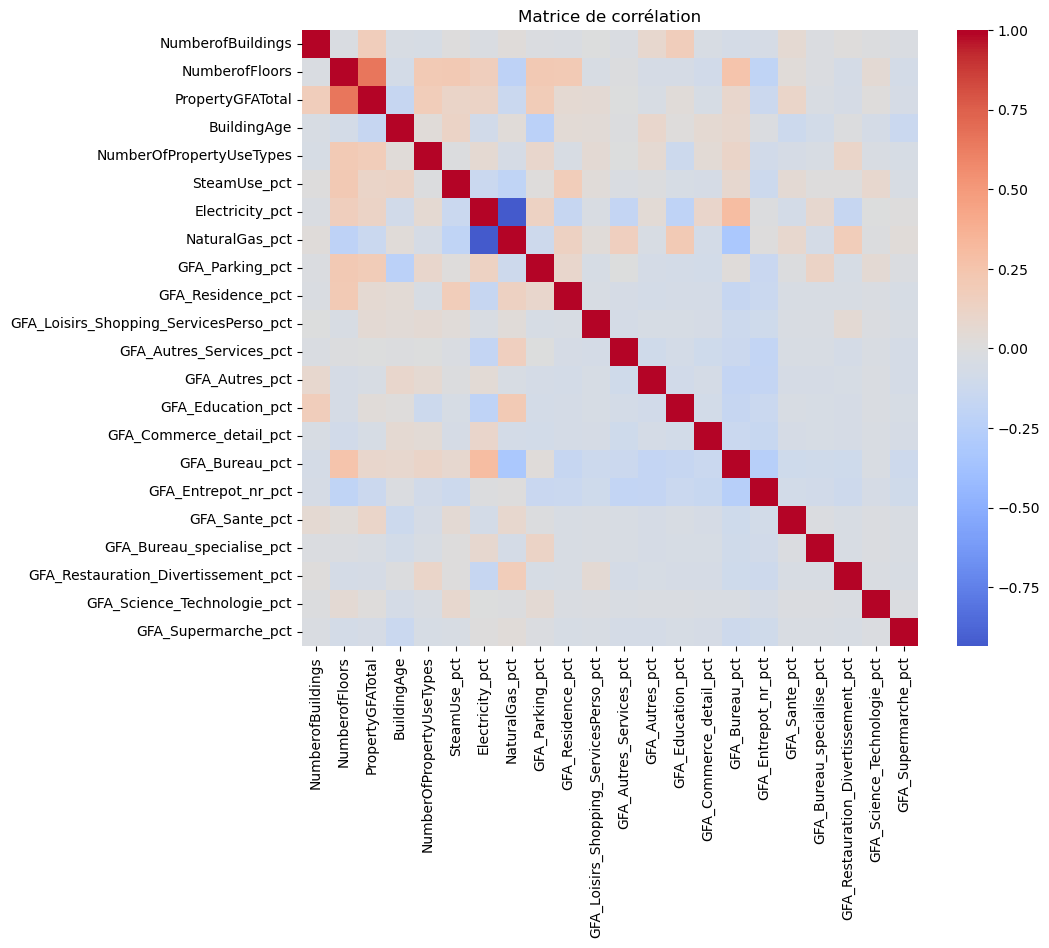

In [55]:
# Calcul de la matrice de corrélation
corr_matrix = X_train_scaled_df.corr()

# Création d'une heatmap avec seaborn
plt.figure(figsize=(10, 8))

sns.heatmap(corr_matrix, annot=False, fmt=".2f", cmap='coolwarm', cbar=True, square=True, center=0)

# Titre et affichage du graphique
plt.title('Matrice de corrélation')
plt.show()

## Tests de modèles

### Data preparation

In [127]:
# Sélection des variables explicatives et des variables cibles
features = df.drop(['TotalGHGEmissions', 'SiteEnergyUseWN(kBtu)', 'Log_TotalGHGEmissions', 'Log_SiteEnergyUseWN', 'ENERGYSTARScore'], axis=1)
target = df['Log_TotalGHGEmissions']

# Transformation des variables catégorielles en variables numériques (encodage one-hot)
features = pd.get_dummies(features)

In [128]:
features.head(1)

NumberofBuildings  NumberofFloors  PropertyGFATotal  BuildingAge  \
0                1.0              12             88434           89   

   NumberOfPropertyUseTypes  SteamUse_pct  Electricity_pct  NaturalGas_pct  \
0                         1      26.87282        52.917723        17.11772   

   GFA_Parking_pct  GFA_Residence_pct  GFA_Loisirs_Shopping_ServicesPerso_pct  \
0              0.0              100.0                                     0.0   

   GFA_Autres_Services_pct  GFA_Autres_pct  GFA_Education_pct  \
0                      0.0             0.0                0.0   

   GFA_Commerce_detail_pct  GFA_Bureau_pct  GFA_Entrepot_nr_pct  \
0                      0.0             0.0                  0.0   

   GFA_Sante_pct  GFA_Bureau_specialise_pct  \
0            0.0                        0.0   

   GFA_Restauration_Divertissement_pct  GFA_Science_Technologie_pct  \
0                                  0.0                          0.0   

   GFA_Supermarche_pct  
0                  0.0

In [129]:
# Séparation des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Conservez les noms des colonnes dans une variable avant la mise à l'échelle
column_names = X_train.columns

# Affichage des dimensions des ensembles d'entraînement et de test
X_train.shape, X_test.shape

((908, 22), (227, 22))

In [130]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 908 entries, 12 to 1126
Data columns (total 22 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   NumberofBuildings                       908 non-null    float64
 1   NumberofFloors                          908 non-null    int64  
 2   PropertyGFATotal                        908 non-null    int64  
 3   BuildingAge                             908 non-null    int64  
 4   NumberOfPropertyUseTypes                908 non-null    int64  
 5   SteamUse_pct                            908 non-null    float64
 6   Electricity_pct                         908 non-null    float64
 7   NaturalGas_pct                          908 non-null    float64
 8   GFA_Parking_pct                         908 non-null    float64
 9   GFA_Residence_pct                       908 non-null    float64
 10  GFA_Loisirs_Shopping_ServicesPerso_pct  908 non-null    float64
 

In [131]:
X_train.head()

NumberofBuildings  NumberofFloors  PropertyGFATotal  BuildingAge  \
12                 1.0               5             57452          109   
381                1.0               2            123000           50   
717                1.0               2             40657           19   
497                1.0               1             29740           55   
967                1.0               3             30408           36   

     NumberOfPropertyUseTypes  SteamUse_pct  Electricity_pct  NaturalGas_pct  \
12                          5     22.548591        47.793403       26.215991   
381                         2      0.000000       100.000000        0.000000   
717                         2      0.000000        96.960067        2.984884   
497                         2      0.000000        82.125234       13.557044   
967                         2      0.000000        98.006080        0.000000   

     GFA_Parking_pct  GFA_Residence_pct  \
12               0.0                0.0   
381              0.0                0.0   
717              0.0                0.0   
497              0.0                0.0   
967              0.0                0.0   

     GFA_Loisirs_Shopping_ServicesPerso_pct  GFA_Autres_Services_pct  \
12                                      0.0                28.618673   
381                                     0.0                 0.000000   
717                                     0.0                 0.000000   
497                                     0.0                 0.000000   
967                                     0.0               100.000000   

     GFA_Autres_pct  GFA_Education_pct  GFA_Commerce_detail_pct  \
12        27.438557                0.0                      0.0   
381        0.000000                0.0                      0.0   
717        0.000000                0.0                      0.0   
497        0.000000                0.0                      0.0   
967        0.000000                0.0                      0.0   

     GFA_Bureau_pct  GFA_Entrepot_nr_pct  GFA_Sante_pct  \
12        16.955023             0.000000            0.0   
381       17.845118            82.154882            0.0   
717      100.000000             0.000000            0.0   
497       59.322937            40.677063            0.0   
967        0.000000             0.000000            0.0   

     GFA_Bureau_specialise_pct  GFA_Restauration_Divertissement_pct  \
12                         0.0                            26.987746   
381                        0.0                             0.000000   
717                        0.0                             0.000000   
497                        0.0                             0.000000   
967                        0.0                             0.000000   

     GFA_Science_Technologie_pct  GFA_Supermarche_pct  
12                           0.0                  0.0  
381                          0.0                  0.0  
717                          0.0                  0.0  
497                          0.0                  0.0  
967                          0.0                  0.0

### Standardisation

In [132]:
# Initialisation du StandardScaler
scaler = StandardScaler()

# Normalisation des ensembles d'entraînement et de test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Affichage des premières lignes des données normalisées pour vérification
X_train_scaled_df = pd.DataFrame(X_train_scaled, index=X_train.index, columns=column_names)
X_train_scaled_df.head(5)

NumberofBuildings  NumberofFloors  PropertyGFATotal  BuildingAge  \
12           -0.118616        0.180511         -0.242440     1.613289   
381          -0.118616       -0.316168          0.082463    -0.226839   
717          -0.118616       -0.316168         -0.325688    -1.193685   
497          -0.118616       -0.481728         -0.379800    -0.070896   
967          -0.118616       -0.150608         -0.376489    -0.663479   

     NumberOfPropertyUseTypes  SteamUse_pct  Electricity_pct  NaturalGas_pct  \
12                   2.696793      2.497745        -0.663238       -0.047874   
381                  0.142529     -0.222517         1.287912       -1.149670   
717                  0.142529     -0.222517         1.174299       -1.024222   
497                  0.142529     -0.222517         0.619867       -0.579900   
967                  0.142529     -0.222517         1.213392       -1.149670   

     GFA_Parking_pct  GFA_Residence_pct  \
12         -0.315565          -0.254048   
381        -0.315565          -0.254048   
717        -0.315565          -0.254048   
497        -0.315565          -0.254048   
967        -0.315565          -0.254048   

     GFA_Loisirs_Shopping_ServicesPerso_pct  GFA_Autres_Services_pct  \
12                                -0.203361                 0.814335   
381                               -0.203361                -0.363496   
717                               -0.203361                -0.363496   
497                               -0.203361                -0.363496   
967                               -0.203361                 3.752106   

     GFA_Autres_pct  GFA_Education_pct  GFA_Commerce_detail_pct  \
12         0.668120          -0.260516                -0.336123   
381       -0.398517          -0.260516                -0.336123   
717       -0.398517          -0.260516                -0.336123   
497       -0.398517          -0.260516                -0.336123   
967       -0.398517          -0.260516                -0.336123   

     GFA_Bureau_pct  GFA_Entrepot_nr_pct  GFA_Sante_pct  \
12        -0.189155            -0.541168      -0.162757   
381       -0.164347             1.684559      -0.162757   
717        2.125451            -0.541168      -0.162757   
497        0.991711             0.560849      -0.162757   
967       -0.661721            -0.541168      -0.162757   

     GFA_Bureau_specialise_pct  GFA_Restauration_Divertissement_pct  \
12                   -0.167941                             1.458989   
381                  -0.167941                            -0.221555   
717                  -0.167941                            -0.221555   
497                  -0.167941                            -0.221555   
967                  -0.167941                            -0.221555   

     GFA_Science_Technologie_pct  GFA_Supermarche_pct  
12                     -0.097666            -0.187021  
381                    -0.097666            -0.187021  
717                    -0.097666            -0.187021  
497                    -0.097666            -0.187021  
967                    -0.097666            -0.187021

### Test multi modèles

In [133]:
# Liste de modèles à évaluer
models = [
    ('DummyRegressorMedian', DummyRegressor(strategy='median')),
    ('LinearRegression', LinearRegression()),
    ('Ridge', Ridge()),
    ('Lasso', Lasso()),
    ('ElasticNet', ElasticNet(random_state=0)),
    ('RandomForest', RandomForestRegressor(random_state=0)),
    ('GradientBoostingReg', GradientBoostingRegressor(random_state=0)),
    ('XGBoostReg', XGBRegressor(random_state=0)),
    ('SVR', SVR()),
    ('AdaBoostReg', AdaBoostRegressor(random_state=0))
]

# Tableau pour collecter les résultats
results = []

# Évaluer chaque modèle
for name, model in models:
    # Entraîner le modèle
    start_time = time.time() 
    model.fit(X_train_scaled, y_train)
    end_time = time.time()  # Enregistre le temps de fin
    duration = end_time - start_time  # Calcule la durée
    
    # Prédire sur l'ensemble de test
    y_pred = model.predict(X_test_scaled)
    
    # Calculer les métriques
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # RMSE CV
    scores_rmse = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
    rmse_cv = np.sqrt(-scores_rmse).mean()
    
    # R2 CV
    scores_r2 = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='r2')
    r2_cv = scores_r2.mean()
    r2_cv_std = scores_r2.std() 
    
    results.append((name, rmse, mae, r2, rmse_cv, r2_cv, r2_cv_std, duration))


In [134]:
# Convertir les résultats en DataFrame
df_results = pd.DataFrame(results, columns=['Modèle', 'RMSE', 'MAE', 'R2', 'RMSE CV', 'R2 CV', 'R2 CV Std', 'Temps de calcul'])
df_sorted_by_performance = df_results.sort_values(by=['R2 CV'], ascending=[False])

df_sorted_by_performance

Modèle      RMSE       MAE        R2   RMSE CV     R2 CV  \
6   GradientBoostingReg  0.553152  0.434706  0.836816  0.592377  0.843686   
5          RandomForest  0.580644  0.457789  0.820192  0.632745  0.822545   
7            XGBoostReg  0.610420  0.476833  0.801278  0.638188  0.819246   
9           AdaBoostReg  0.669892  0.532317  0.760670  0.719504  0.769668   
8                   SVR  0.716561  0.557932  0.726162  0.753813  0.748115   
1      LinearRegression  0.819566  0.642561  0.641775  0.795698  0.719576   
2                 Ridge  0.817698  0.642831  0.643406  0.796339  0.719155   
4            ElasticNet  1.266421  0.994872  0.144649  1.375381  0.162269   
3                 Lasso  1.372498  1.076277 -0.004642  1.504665 -0.002870   
0  DummyRegressorMedian  1.370029  1.075025 -0.001031  1.505240 -0.003594   

   R2 CV Std  Temps de calcul  
6   0.017342         0.219564  
5   0.016368         0.709828  
7   0.020060         0.113531  
9   0.030407         0.094090  
8   0.021868         0.030007  
1   0.032217         0.001000  
2   0.034162         0.001000  
4   0.012501         0.000000  
3   0.003210         0.000000  
0   0.002272         0.001000

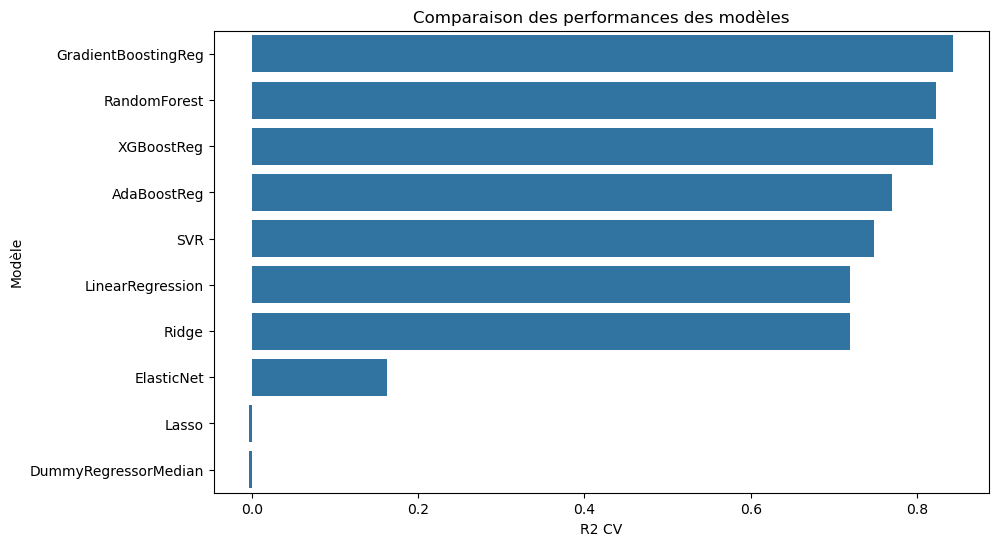

In [135]:
plt.figure(figsize=(10, 6))
sns.barplot(x='R2 CV', y='Modèle', data=df_sorted_by_performance)
plt.title('Comparaison des performances des modèles')
plt.show()

Les modèles GradientBoostingReg affiche les meilleurs performances.

## Optimisation du GradientBoostingReg

### Le modèle de base

In [136]:
# Création du modèle Gradient Boosting
gb_model = GradientBoostingRegressor()

# Entraînement du modèle sur les données d'entraînement
gb_model.fit(X_train_scaled, y_train)

# Prédiction sur le jeu de test
y_pred_gb = gb_model.predict(X_test_scaled)

# Calcul des métriques pour le meilleur modèle
rmse_base = np.sqrt(mean_squared_error(y_test, y_pred_gb))
r2_base = r2_score(y_test, y_pred_gb)
mae_base = mean_absolute_error(y_test, y_pred_gb)

print("Métriques pour le modèle GBR :")
print("RMSE :", rmse_base)
print("R² :", r2_base)
print("MAE :", mae_base)

Métriques pour le modèle GBR :
RMSE : 0.5533035905519242
R² : 0.8367267612054805
MAE : 0.43494181438605106


In [137]:
importances_gb = gb_model.feature_importances_

# Création d'un DataFrame pour afficher l'importance des variables
features_gb = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances_gb})
features_gb = features_gb.sort_values(by='Importance', ascending=False)

# Tri des caractéristiques par importance croissante
features_gb = features_gb.sort_values('Importance', ascending=False)

print(features_gb)

                                   Feature  Importance
2                         PropertyGFATotal    0.448594
6                          Electricity_pct    0.260980
7                           NaturalGas_pct    0.098631
16                     GFA_Entrepot_nr_pct    0.083204
21                     GFA_Supermarche_pct    0.030442
3                              BuildingAge    0.013632
20             GFA_Science_Technologie_pct    0.012285
19     GFA_Restauration_Divertissement_pct    0.009893
11                 GFA_Autres_Services_pct    0.009830
5                             SteamUse_pct    0.007750
17                           GFA_Sante_pct    0.006974
12                          GFA_Autres_pct    0.005075
1                           NumberofFloors    0.004176
15                          GFA_Bureau_pct    0.001957
14                 GFA_Commerce_detail_pct    0.001956
8                          GFA_Parking_pct    0.001745
13                       GFA_Education_pct    0.001302
0         

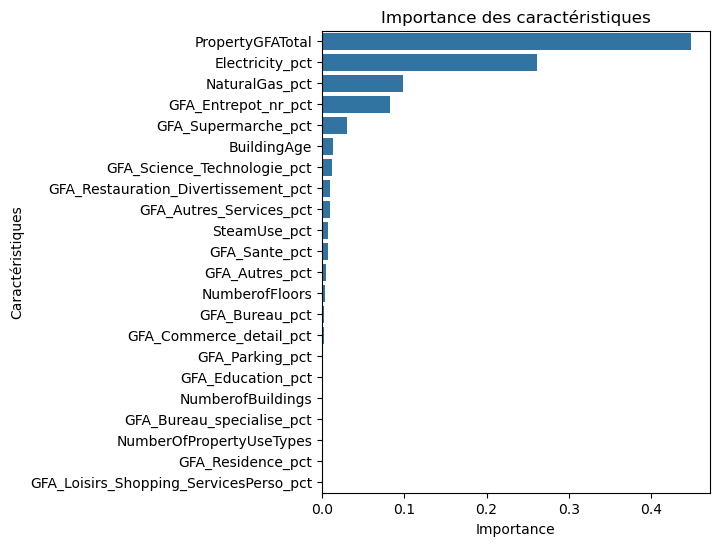

In [138]:
plt.figure(figsize=(5, 6))
sns.barplot(x="Importance", y="Feature", data=features_gb)
plt.title('Importance des caractéristiques')
plt.xlabel('Importance')
plt.ylabel('Caractéristiques')
plt.show()

### Recherche des hyperparamètres

In [139]:
# Définition des hyperparamètres à tester
param_dist = {
    'n_estimators': np.arange(50, 500, 10),
    'learning_rate': np.linspace(0.008, 0.2, 20),
    'max_depth': np.arange(2, 10, 1),
    'min_samples_split': np.arange(2, 10, 1),
    'min_samples_leaf': np.arange(1, 5, 1),
    'subsample': np.linspace(0.3, 0.9, 20)
}

# Initialisation de la recherche aléatoire
random_search = RandomizedSearchCV(GradientBoostingRegressor(), param_distributions=param_dist, n_iter=100, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Exécution de la recherche aléatoire sur le jeu d'entraînement
random_search.fit(X_train_scaled, y_train)

# Récupération du meilleur modèle
best_gb_model = random_search.best_estimator_

# Affichage des meilleurs paramètres et du meilleur score
print("Meilleurs hyperparamètres (RandomizedSearchCV) pour GBR: ", random_search.best_params_)
meilleur_score_rmse_gbr = np.sqrt(-random_search.best_score_) 
print("Meilleur score (RMSE) pour GBR: ", meilleur_score_rmse_gbr)

Meilleurs hyperparamètres (RandomizedSearchCV) pour GBR:  {'subsample': 0.9, 'n_estimators': 190, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 2, 'learning_rate': 0.14947368421052631}
Meilleur score (RMSE) pour GBR:  0.5769379544707278


In [82]:
# Définition de la grille d'hyperparamètres
param_grid = {
    'learning_rate': [0.028, 0.048, 0.058],
    'max_depth': [2, 3, 4],
    'min_samples_leaf': [2, 3, 4],
    'min_samples_split': [2, 5, 9],
    'n_estimators': [260, 360, 460],
    'subsample': [0.39, 0.4, 0.5]
}

# Configuration de GridSearchCV
grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)

# Exécution de la recherche d'hyperparamètres
grid_search.fit(X_train_scaled, y_train)

# Affichage des meilleurs paramètres
print("Meilleurs paramètres :", grid_search.best_params_)

# Prédiction avec le meilleur modèle
y_pred = grid_search.best_estimator_.predict(X_test_scaled)

# Calcul des métriques pour le meilleur modèle
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
smape = 100 * np.mean(2 * np.abs(y_pred - y_test) / (np.abs(y_pred) + np.abs(y_test)))

print("RMSE avec GridSearchCV pour GBR: {:.4f}".format(rmse))
print("MAE avec GridSearchCV pour GBR: {:.4f}".format(mae))
print("R2 avec GridSearchCV pour GBR: {:.4f}".format(r2))
print("SMAPE avec GridSearchCV pour GBR: {:.4f}%".format(smape))


Fitting 5 folds for each of 729 candidates, totalling 3645 fits
Meilleurs paramètres : {'learning_rate': 0.058, 'max_depth': 2, 'min_samples_leaf': 3, 'min_samples_split': 9, 'n_estimators': 460, 'subsample': 0.5}
RMSE avec GridSearchCV pour GBR: 0.5440
MAE avec GridSearchCV pour GBR: 0.4156
R2 avec GridSearchCV pour GBR: 0.8422
SMAPE avec GridSearchCV pour GBR: 14.0835%


In [83]:
# Meilleurs hyperparamètres obtenus de GridSearchCV
best_params = grid_search.best_params_

# Configuration du modèle avec les meilleurs hyperparamètres
best_gb_model = GradientBoostingRegressor(
    n_estimators=best_params['n_estimators'],
    learning_rate=best_params['learning_rate'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    subsample=best_params['subsample'],
    random_state=0
)

# Métriques à évaluer lors de la validation croisée
scoring_metrics = ['neg_mean_squared_error', 'r2', 'neg_mean_absolute_error']

# Exécution de la validation croisée (5 plis)
cv_results = cross_validate(best_gb_model, X_train_scaled, y_train, cv=5, scoring=scoring_metrics, return_train_score=True)

# Calcul et affichage des métriques moyennes pour chaque pli
rmse_scores = np.sqrt(-cv_results['test_neg_mean_squared_error'])
r2_scores = cv_results['test_r2']
mae_scores = -cv_results['test_neg_mean_absolute_error']

# Affichage avec écart type
print(f"Validation Croisée RMSE: {rmse_scores.mean():.4f} (± {rmse_scores.std():.4f})")
print(f"Validation Croisée MAE: {mae_scores.mean():.4f} (± {mae_scores.std():.4f})")
print(f"Validation Croisée R²: {r2_scores.mean():.4f} (± {r2_scores.std():.4f})")

Validation Croisée RMSE: 0.5764 (± 0.0321)
Validation Croisée MAE: 0.4456 (± 0.0284)
Validation Croisée R²: 0.8523 (± 0.0143)


In [84]:
best_gb_model.fit(X_train_scaled, y_train) 

# Prédictions sur l'ensemble d'entraînement
y_train_pred = best_gb_model.predict(X_train_scaled)

# Prédictions sur l'ensemble de test
y_test_pred = best_gb_model.predict(X_test_scaled)

# Calcul des métriques pour l'ensemble d'entraînement
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_r2 = r2_score(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)

# Calcul des métriques pour l'ensemble de test
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_r2 = r2_score(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

# Affichage des métriques
print("Ensemble d'entraînement : RMSE = {:.4f}, R² = {:.4f}, MAE = {:.4f}".format(train_rmse, train_r2, train_mae))
print("Ensemble de test : RMSE = {:.4f}, R² = {:.4f}, MAE = {:.4f}".format(test_rmse, test_r2, test_mae))

Ensemble d'entraînement : RMSE = 0.4172, R² = 0.9232, MAE = 0.3226
Ensemble de test : RMSE = 0.5544, R² = 0.8361, MAE = 0.4270


## Analyse des erreurs

### Avec les cibles en log

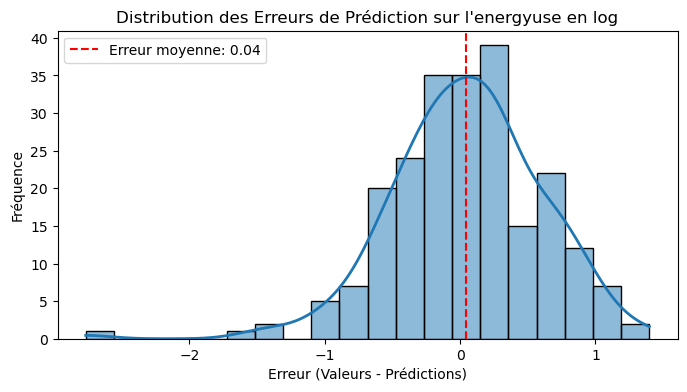

In [85]:
# Calcul des erreurs
errors = y_test - y_test_pred

# Calcul de l'erreur moyenne
mean_error = np.mean(errors)

# Visualisation de la distribution des erreurs
# Couleurs de la palette tab10
colors_tab10 = plt.cm.tab10(np.arange(10))
plt.figure(figsize=(8, 4))
sns.histplot(errors, kde=True, color=colors_tab10[0], line_kws={'color': colors_tab10[1], 'linewidth': 2})
plt.axvline(mean_error, color='red', linestyle='--', label=f'Erreur moyenne: {mean_error:.2f}')
plt.title('Distribution des Erreurs de Prédiction sur l\'energyuse en log')
plt.xlabel('Erreur (Valeurs - Prédictions)')
plt.ylabel('Fréquence')
plt.legend()

plt.show()

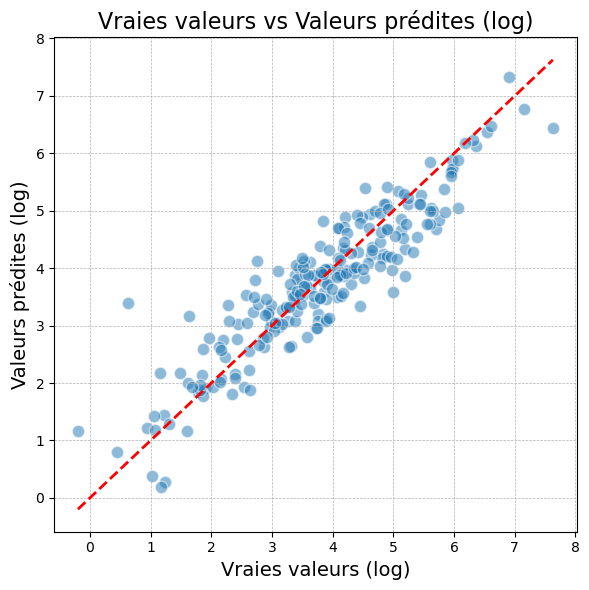

In [86]:
plt.figure(figsize=(6, 6))  # Augmenter la taille du graphique
plt.scatter(y_test, y_test_pred, alpha=0.5, edgecolors='w', s=80)  # Ajouter des bords blancs pour mieux distinguer les points superposés
plt.title('Vraies valeurs vs Valeurs prédites (log)', fontsize=16)
plt.xlabel('Vraies valeurs (log)', fontsize=14)
plt.ylabel('Valeurs prédites (log)', fontsize=14)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2, linestyle='--')  # Ligne y=x
plt.grid(True, which='major', linestyle='--', linewidth=0.5)  # Grille plus fine
plt.grid(True, which='minor', linestyle=':', linewidth=0.5, alpha=0.7)  # Grille mineure
plt.tight_layout()  # Ajuste automatiquement les sous-graphiques pour bien remplir la figure
plt.show()


### Avec les valeurs réelles

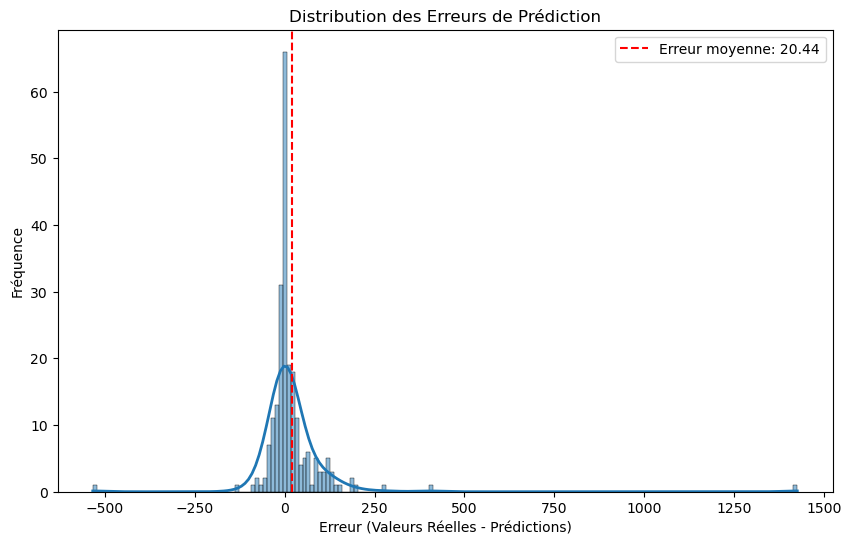

In [88]:
# Conversion des prédictions et des valeurs réelles de test de log à l'échelle originale
y_test_pred_original = np.exp(y_test_pred) 
y_test_original = np.exp(y_test)  

# Calcul des erreurs
errors = y_test_original - y_test_pred_original

# Calcul de l'erreur moyenne
mean_error = np.mean(errors)

# Visualisation de la distribution des erreurs
plt.figure(figsize=(10, 6))
sns.histplot(errors, kde=True, color=colors_tab10[0], line_kws={'color': colors_tab10[1], 'linewidth': 2})
plt.axvline(mean_error, color='red', linestyle='--', label=f'Erreur moyenne: {mean_error:.2f}')
plt.title('Distribution des Erreurs de Prédiction')
plt.xlabel('Erreur (Valeurs Réelles - Prédictions)')
plt.ylabel('Fréquence')
plt.legend()

plt.show()

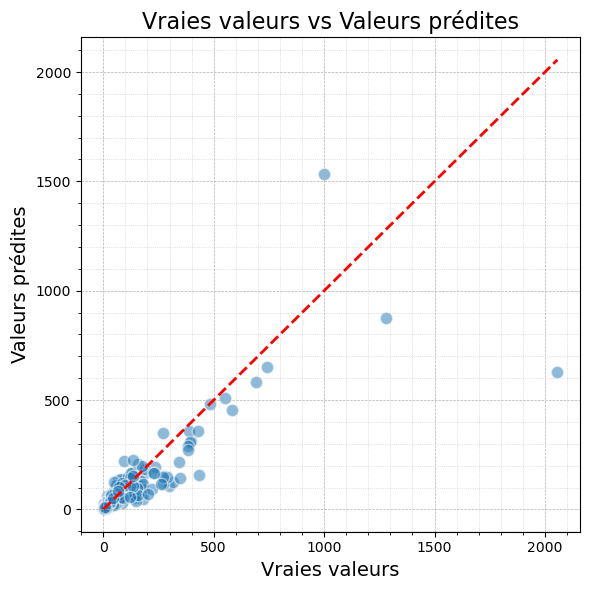

In [89]:
plt.figure(figsize=(6, 6)) 
plt.scatter(y_test_original, y_test_pred_original, alpha=0.5, edgecolors='w', s=80)  
plt.title('Vraies valeurs vs Valeurs prédites', fontsize=16)
plt.xlabel('Vraies valeurs', fontsize=14)
plt.ylabel('Valeurs prédites', fontsize=14)
plt.plot([min(y_test_original), max(y_test_original)], [min(y_test_original), max(y_test_original)], color='red', lw=2, linestyle='--')  # Ligne y=x
plt.grid(True, which='major', linestyle='--', linewidth=0.5) 
plt.minorticks_on() 
plt.grid(True, which='minor', linestyle=':', linewidth=0.5, alpha=0.7) 
plt.tight_layout() 
plt.show()

In [90]:
# Création d'un DataFrame avec les valeurs réelles et prédites
df_errors = pd.DataFrame({'Valeurs réelles': y_test_original, 'Valeurs prédites': y_test_pred_original})


# Calcul des erreurs absolues et ajout en tant que nouvelle colonne
df_errors['Erreurs absolues'] = abs(df_errors['Valeurs réelles'] - df_errors['Valeurs prédites'])

# Trier le DataFrame par les erreurs absolues de façon décroissante
df_errors_sorted = df_errors.sort_values('Erreurs absolues', ascending=False)

# Afficher les 15 erreurs les plus grandes
print(df_errors_sorted.head(15))

      Valeurs réelles  Valeurs prédites  Erreurs absolues
63            2055.82        629.381233       1426.438767
1120          1000.06       1534.056020        533.996020
1107          1280.81        875.831250        404.978750
100            433.60        156.728113        276.871887
525            348.22        145.849055        202.370945
900            298.91        107.349684        191.560316
333            314.43        126.120093        188.309907
1083           270.63        117.937501        152.692499
1128           259.22        117.478786        141.741214
3              286.43        148.707632        137.722368
58             204.08         71.820559        132.259441
363            179.45         47.344982        132.105018
1018            92.52        220.027279        127.507279
342            582.28        456.023308        126.256692
597            218.79         94.058224        124.731776


In [91]:
indices_plus_gd_erreurs = df_errors_sorted.head(15).index
df_top_errors = df.loc[indices_plus_gd_erreurs]
df_top_errors

NumberofBuildings  NumberofFloors  PropertyGFATotal  ENERGYSTARScore  \
63                  1.0              11            299070              NaN   
1120                1.0               6            345290              NaN   
1107                1.0               3            428347              NaN   
100                 1.0              15            230880              NaN   
525                 1.0               1             47105              NaN   
900                 1.0               2             47963              NaN   
333                 1.0               5            287224              NaN   
1083                5.0               1             87458              NaN   
1128                1.0               1             23445              NaN   
3                   1.0              10             61320             56.0   
58                  1.0               1             67356              NaN   
363                 1.0               4             99122              NaN   
1018                1.0               6            706176             82.0   
342                 1.0              18            363934             68.0   
597                 1.0               2             25380              NaN   

      SiteEnergyUseWN(kBtu)  TotalGHGEmissions  BuildingAge  \
63               66000296.0            2055.82           12   
1120             41078600.0            1000.06            1   
1107             38977108.0            1280.81           91   
100              61674856.0             433.60           61   
525              10234721.0             348.22           40   
900               8224244.0             298.91           25   
333              21299472.0             314.43            8   
1083              9271981.0             270.63           50   
1128              6716330.0             259.22          104   
3                 6946800.5             286.43           90   
58                8086930.5             204.08           66   
363              14522162.0             179.45           72   
1018             13473994.0              92.52           16   
342              23128454.0             582.28           91   
597               6868711.5             218.79          104   

      NumberOfPropertyUseTypes  SteamUse_pct  Electricity_pct  NaturalGas_pct  \
63                           1      0.000000        46.441677       52.553296   
1120                         6      0.000000        57.540432       38.285891   
1107                         1     34.779951        56.265380        3.939084   
100                          1      0.000000       100.000000        0.000000   
525                          1      0.000000        41.367517       58.632483   
900                          2      0.000000        35.484976       63.775370   
333                          4      0.000000        81.727387       17.068127   
1083                         4      0.000000        41.957884       49.449098   
1128                         1      0.000000        18.773197       70.207625   
3                            1     31.877211        39.858983       26.072621   
58                           4      0.000000        51.713082       40.727146   
363                          2      0.000000        87.907902       11.727579   
1018                         3      0.000000        98.491101        0.000000   
342                          3     26.332013        69.188978        0.051802   
597                          3      0.000000        46.399362       53.600638   

      GFA_Parking_pct  GFA_Residence_pct  \
63          21.490302                0.0   
1120        19.910502                0.0   
1107         0.000000                0.0   
100          0.000000                0.0   
525          0.000000                0.0   
900         37.500000                0.0   
333         30.191636                0.0   
1083         0.000000                0.0   
1128         0.000000                0.0   
3          

## Analyse des features

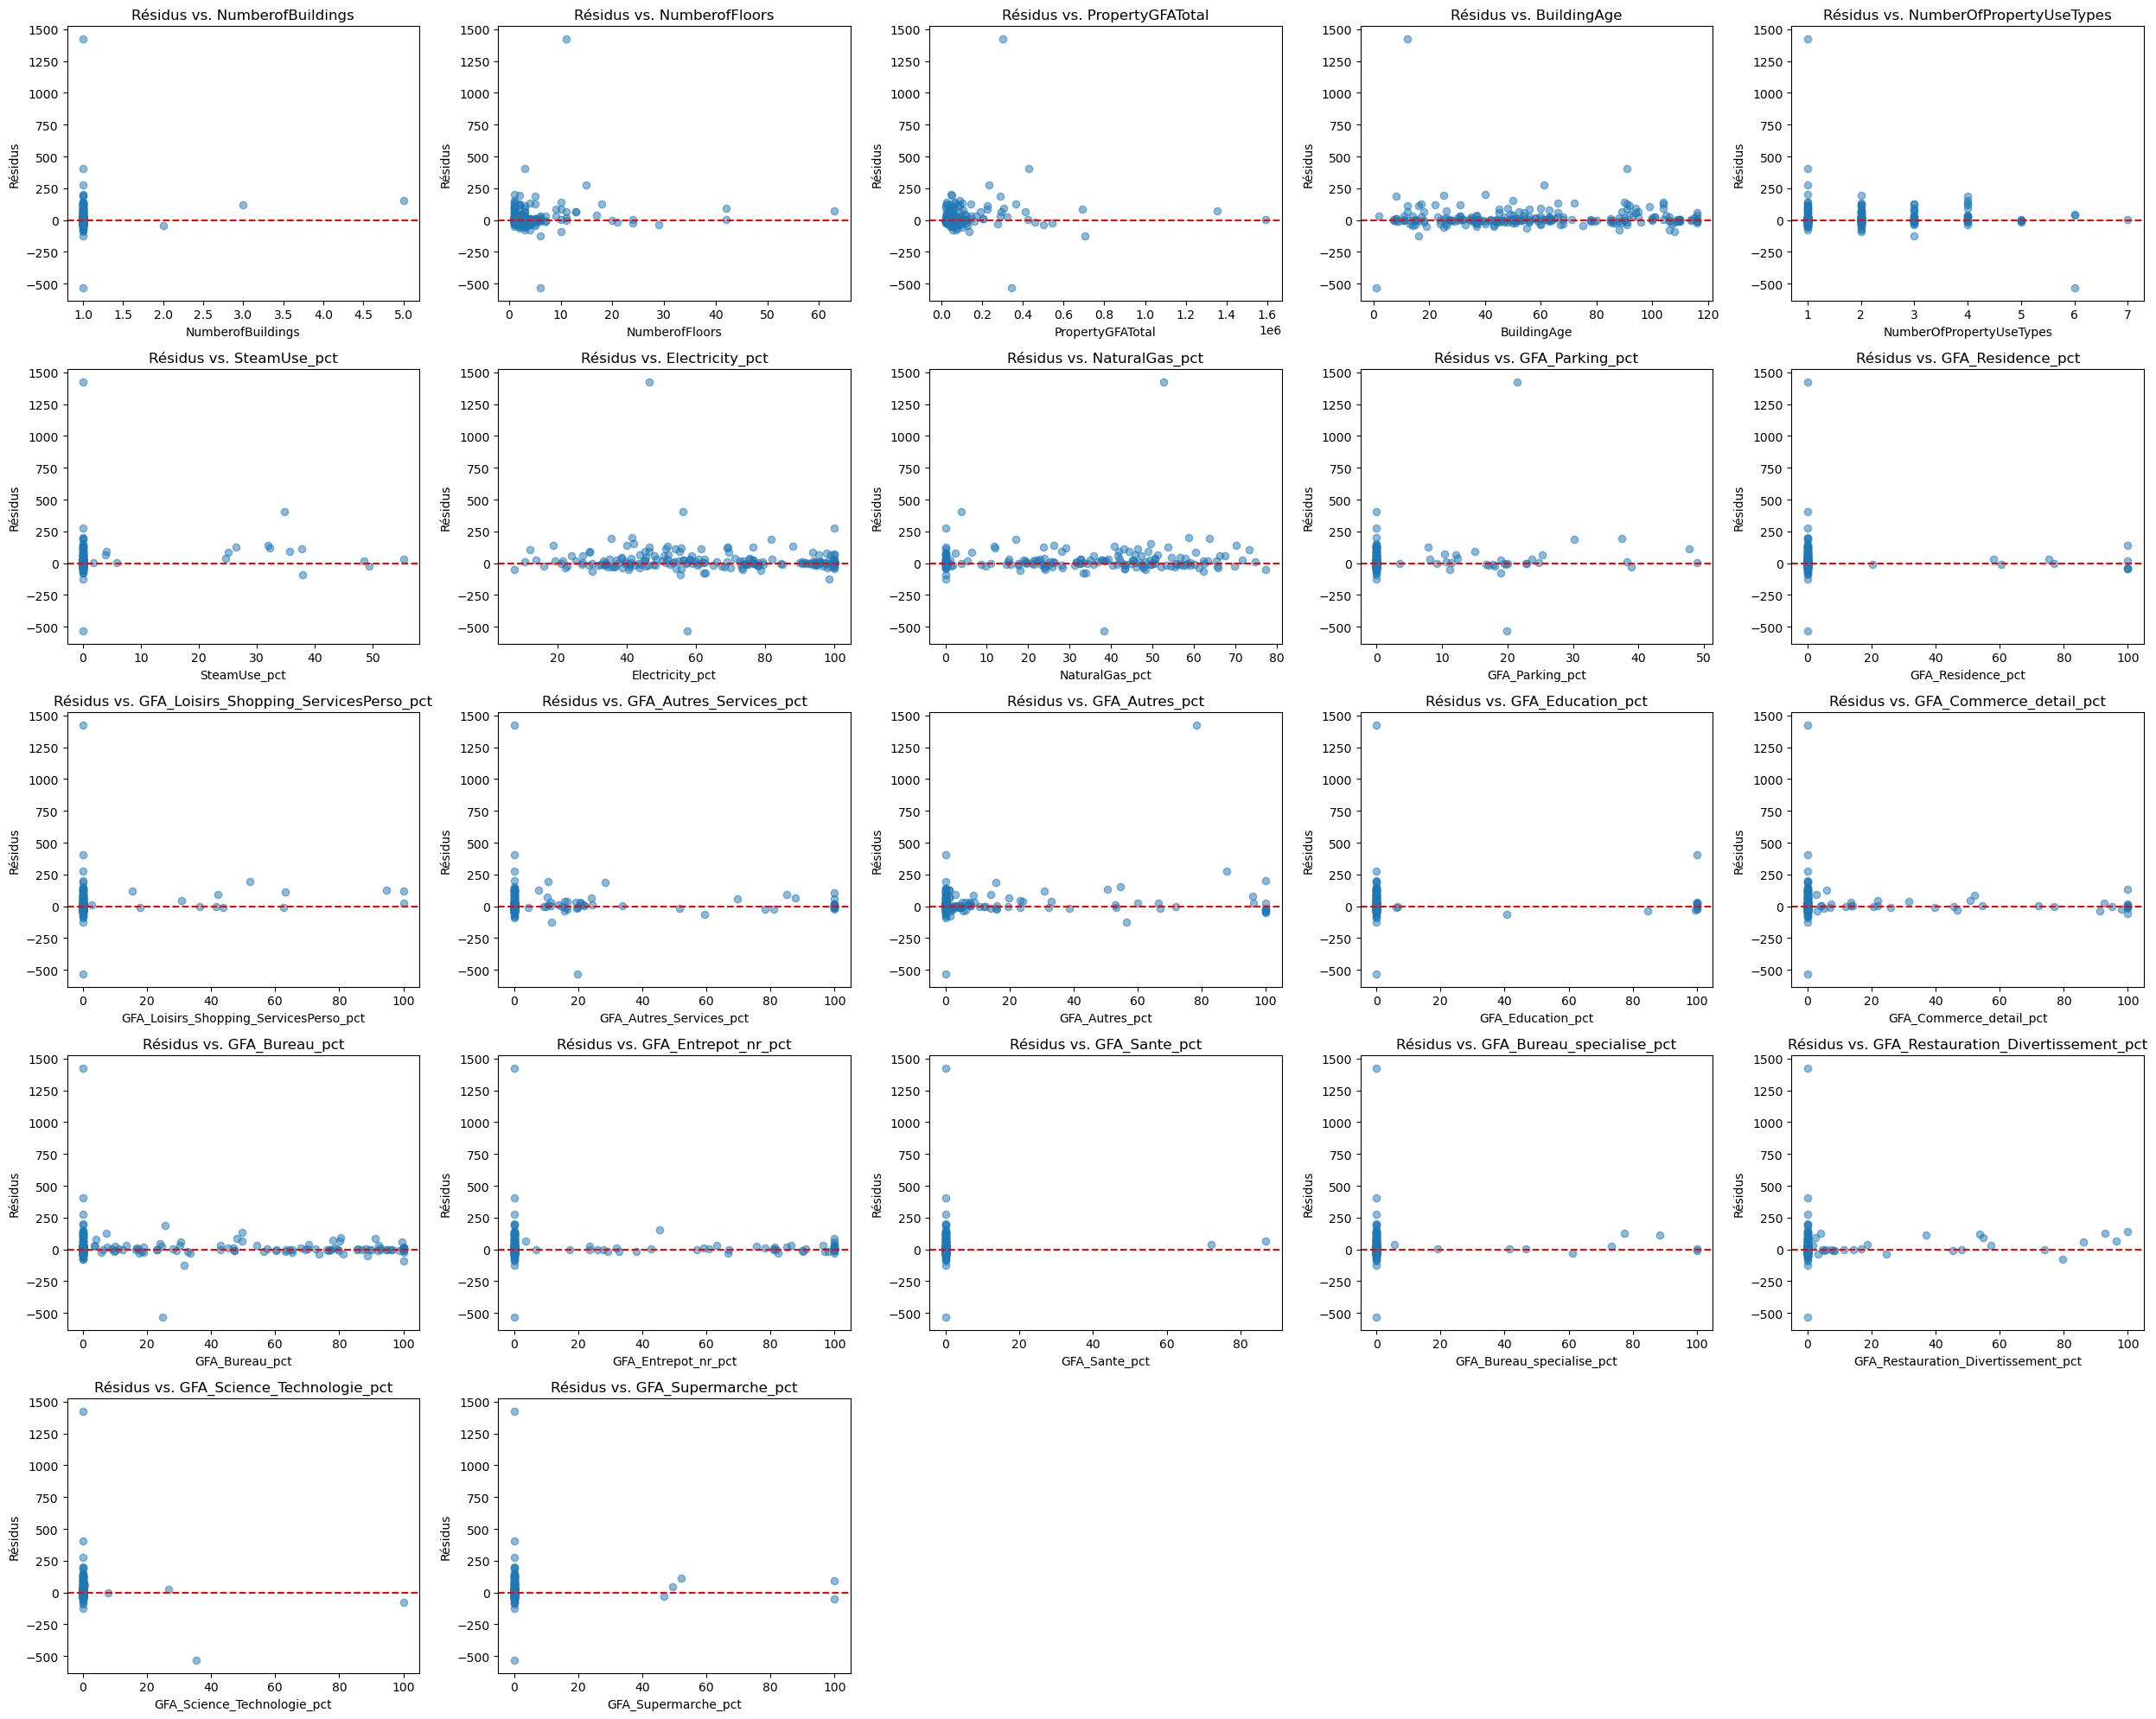

In [92]:
# Nombre de colonnes
n_cols = X_test.shape[1]

# Définir le nombre de graphiques par ligne
n_graph_par_ligne = 5

# Calculer le nombre total de lignes nécessaires
n_lignes = int(np.ceil(n_cols / n_graph_par_ligne)) 

# Figure pour les sous-graphiques
plt.figure(figsize=(n_graph_par_ligne * 5, n_lignes * 4))

for i, feature in enumerate(X_test.columns):
    plt.subplot(n_lignes, n_graph_par_ligne, i+1)
    plt.scatter(X_test[feature], errors, alpha=0.5)
    plt.title(f'Résidus vs. {feature}')
    plt.xlabel(feature)
    plt.ylabel('Résidus')
    plt.axhline(y=0, color='r', linestyle='--')

# Ajuster
plt.tight_layout()
plt.show()


In [93]:
# Initialiser l'explainer SHAP
explainer = shap.TreeExplainer(best_gb_model)

# Calculer les valeurs SHAP pour l'ensemble d'entraînement
shap_values = explainer.shap_values(X_test_scaled)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


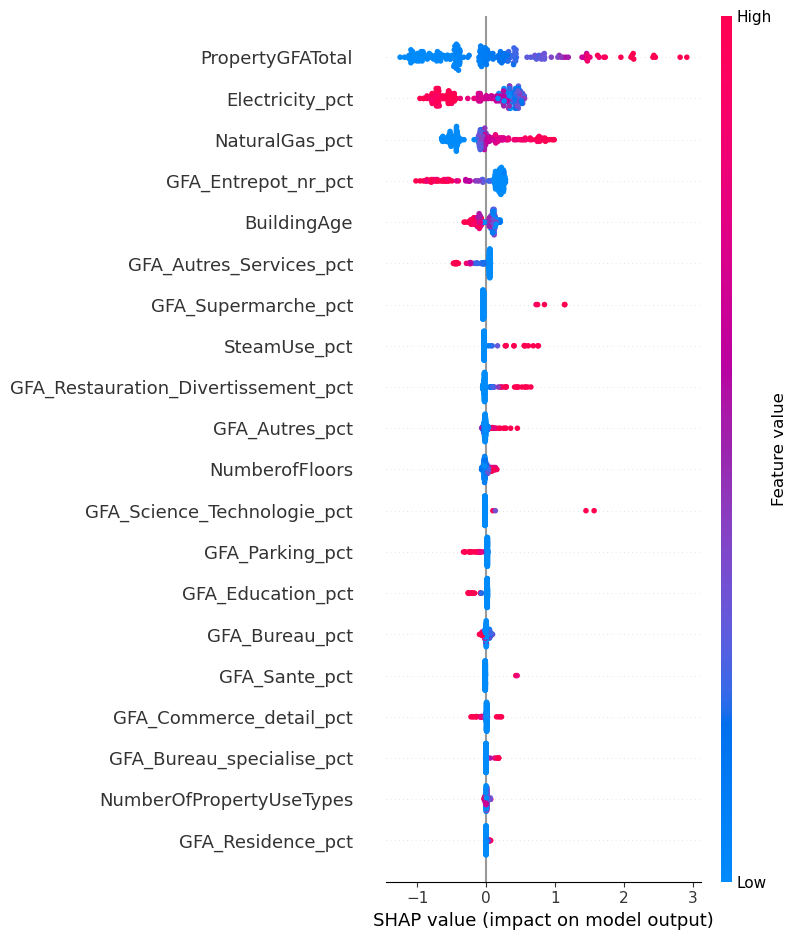

In [94]:
# Résumé de l'importance des caractéristiques
shap.summary_plot(shap_values, X_test_scaled, feature_names=X_test.columns)

In [95]:
shap_df = pd.DataFrame(shap_values, columns=X_test.columns)
shap_df['prediction_error'] = y_test - y_test_pred  
shap_df.index = X_test.index

for feature in X_test.columns:
    non_zero_indices = X_test[feature] != 0
    non_zero_shap = shap_df[feature][non_zero_indices].dropna()
    non_zero_errors = shap_df['prediction_error'][non_zero_indices].dropna()

    # Assurez-vous que les séries ont des indices alignés et des valeurs non-NaN après le nettoyage
    common_indices = non_zero_shap.index.intersection(non_zero_errors.index)
    non_zero_shap = non_zero_shap.loc[common_indices]
    non_zero_errors = non_zero_errors.loc[common_indices]

    # Vérifiez que nous avons suffisamment de valeurs non nulles et non-NaN pour calculer la corrélation
    if len(non_zero_shap) > 1 and non_zero_shap.std() != 0:
        correlation = non_zero_shap.corr(non_zero_errors)
        print(f'Corrélation de la caractéristique {feature} avec l\'erreur de prédiction: {correlation}')
    elif non_zero_shap.std() == 0:
        print(f'La caractéristique {feature} a une variance nulle.')
    elif len(non_zero_shap) <= 1:
        print(f'Pas assez de données non nulles pour {feature}.')


Corrélation de la caractéristique NumberofBuildings avec l'erreur de prédiction: -0.05739705119534031
Corrélation de la caractéristique NumberofFloors avec l'erreur de prédiction: -0.021354610127849727
Corrélation de la caractéristique PropertyGFATotal avec l'erreur de prédiction: -0.1635434907982043
Corrélation de la caractéristique BuildingAge avec l'erreur de prédiction: -0.15151626324170886
Corrélation de la caractéristique NumberOfPropertyUseTypes avec l'erreur de prédiction: 0.18802062531693126
Corrélation de la caractéristique SteamUse_pct avec l'erreur de prédiction: -0.461413774499484
Corrélation de la caractéristique Electricity_pct avec l'erreur de prédiction: 0.19652680132799796
Corrélation de la caractéristique NaturalGas_pct avec l'erreur de prédiction: 0.3717712177402865
Corrélation de la caractéristique GFA_Parking_pct avec l'erreur de prédiction: -0.7353700464025518
Pas assez de données non nulles pour GFA_Residence_pct.
Corrélation de la caractéristique GFA_Loisirs_Sh

    Corrélations Négatives : lorsque la valeur de ces caractéristiques augmente, l'erreur de prédiction a tendance à diminuer (ou vice versa). 

    Corrélations Positives : lorsque la valeur de ces caractéristiques augmente, l'erreur de prédiction a tendance à augmentater l'erreur de prédiction. 
    
    Variance Nulle ou Données Insuffisantes : Plusieurs caractéristiques montrent une absence de données suffisantes pour calculer la corrélation ou une variance nulle ce qui indique que ces caractéristiques peuvent ne pas varier suffisamment dans l'ensemble de données ou sont majoritairement nulles, limitant leur utilité dans le modèle.

Implications :

    Les caractéristiques avec des corrélations significatives (positives ou négatives) peuvent nécessiter une attention particulière pour comprendre leur impact sur le modèle. Par exemple, des caractéristiques avec une forte corrélation négative pourraient être des indicateurs clés de réduction d'erreur, tandis que celles avec une corrélation positive pourraient indiquer des domaines où le modèle sur-estime ou sous-estime systématiquement.

    Les caractéristiques avec une variance nulle ou un manque de données non nulles peuvent nécessiter une réévaluation quant à leur inclusion dans le modèle. Il peut être utile d'examiner si ces caractéristiques sont pertinentes ou si elles doivent être transformées ou remplacées par d'autres indicateurs plus informatifs.

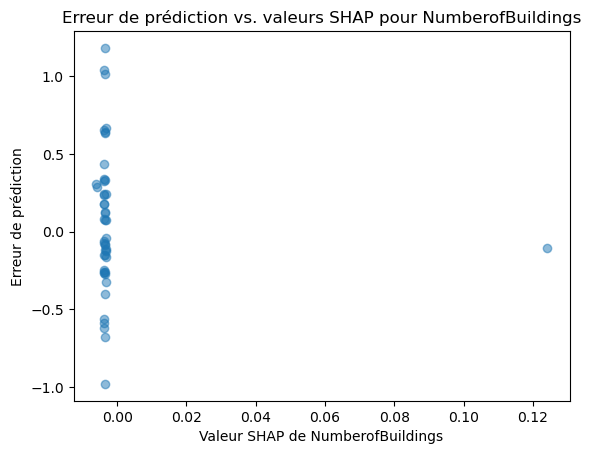

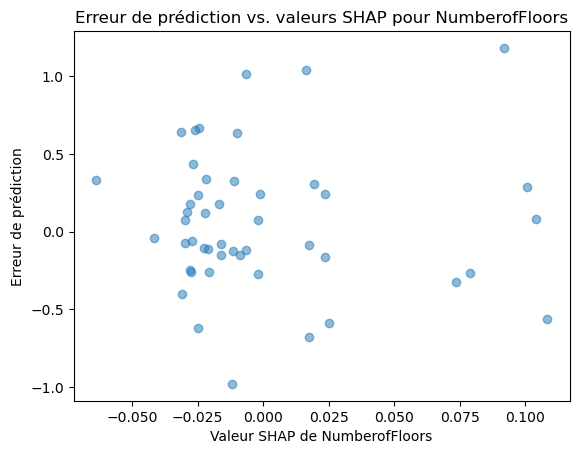

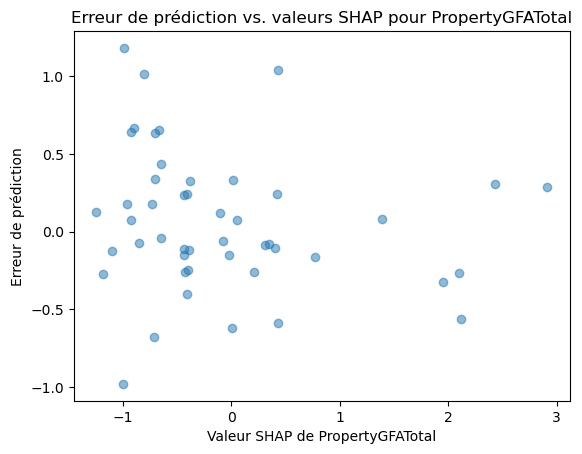

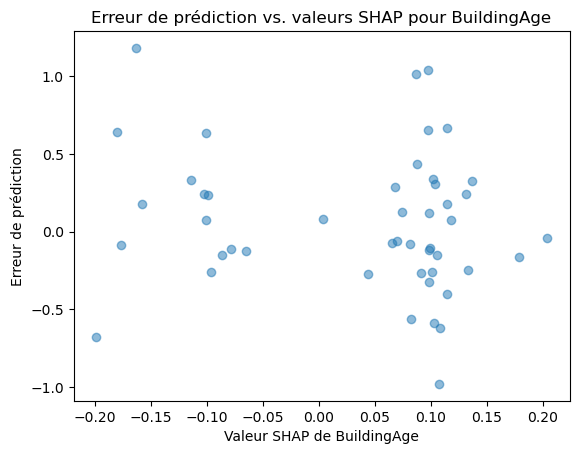

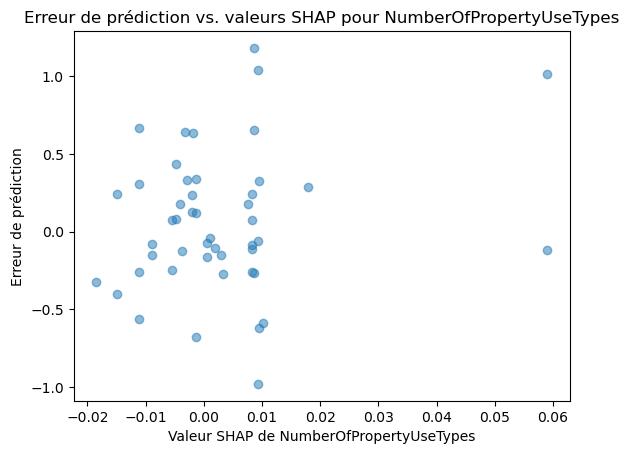

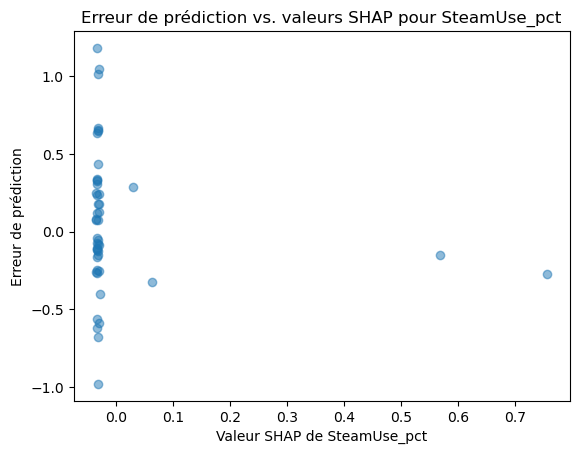

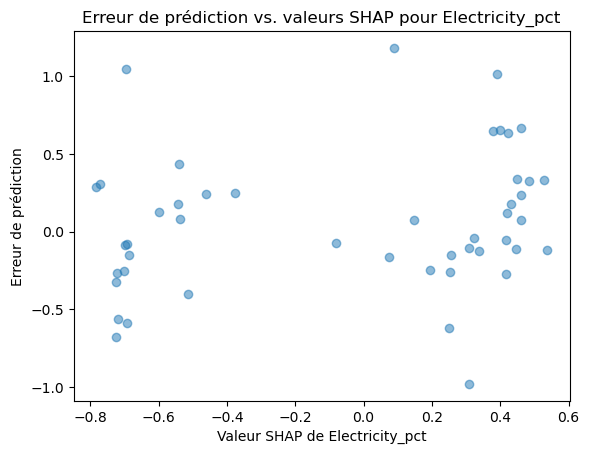

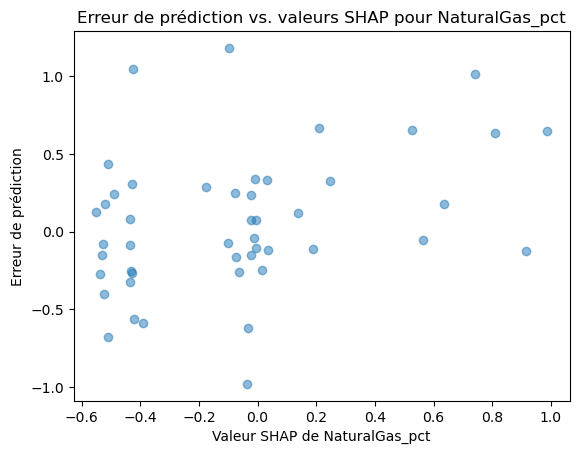

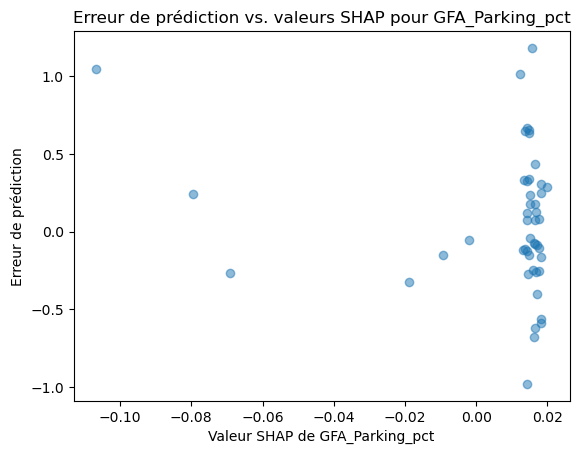

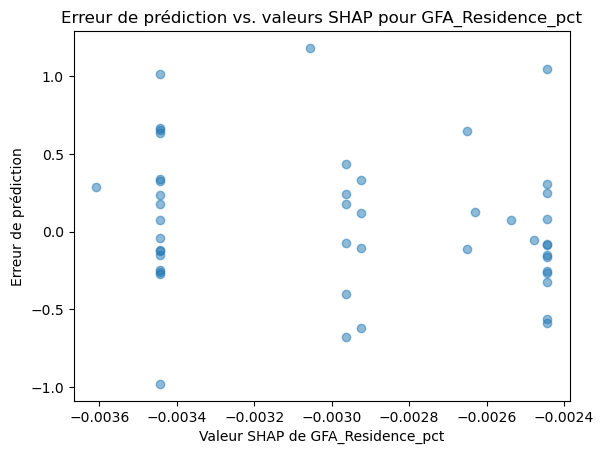

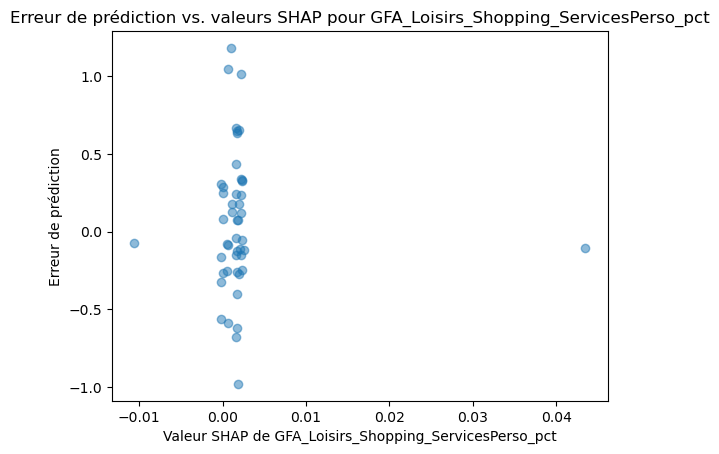

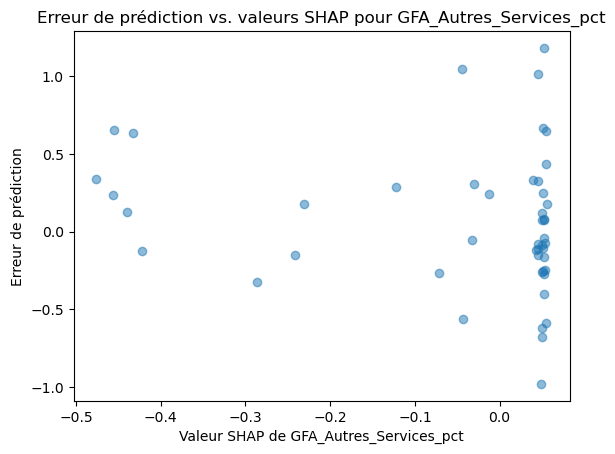

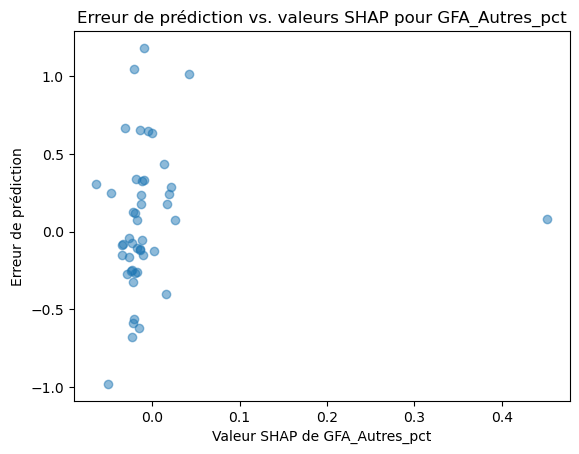

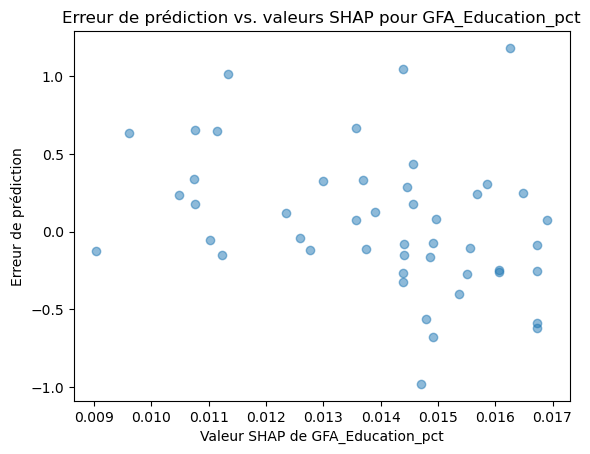

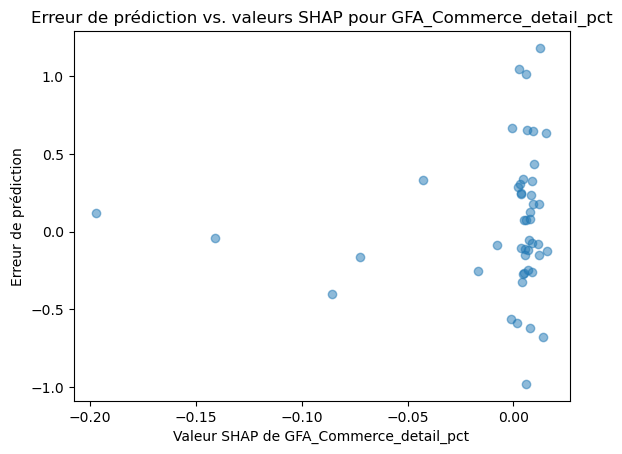

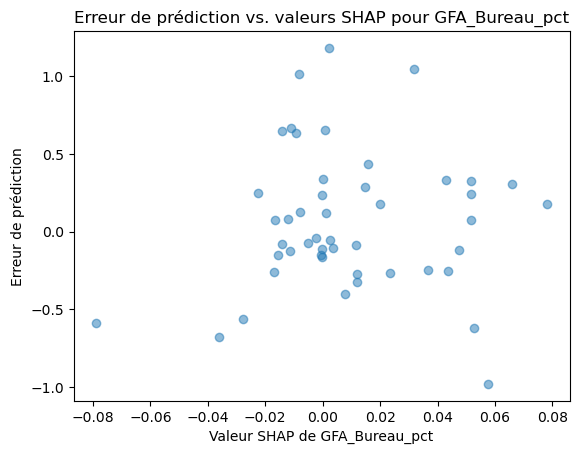

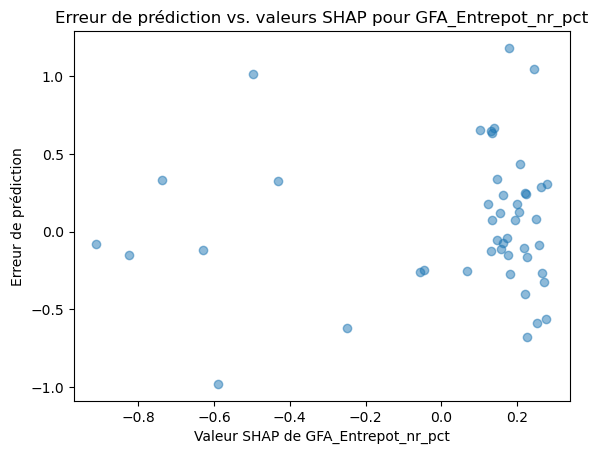

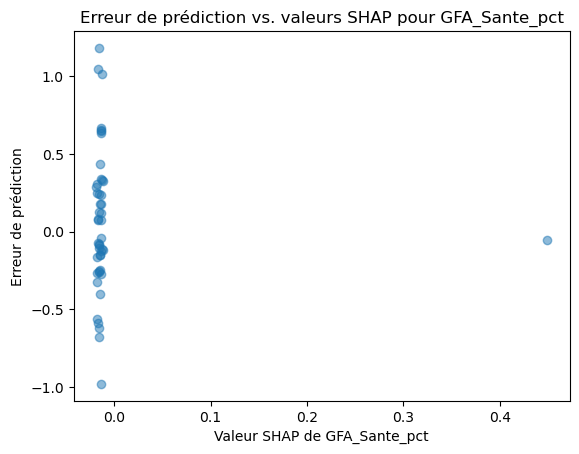

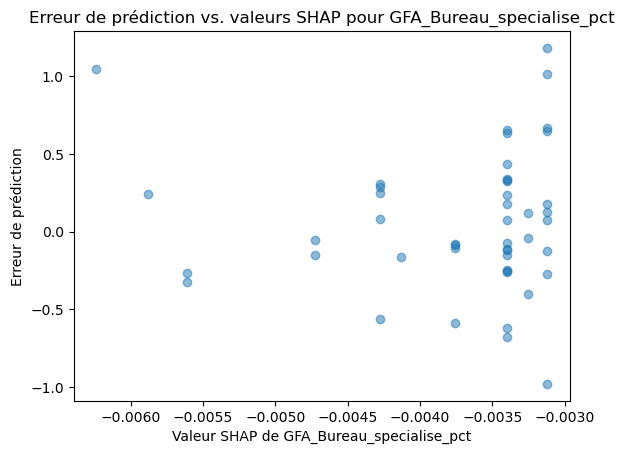

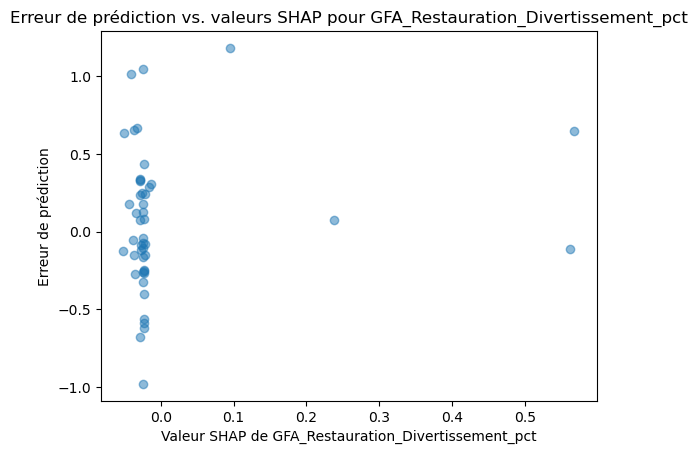

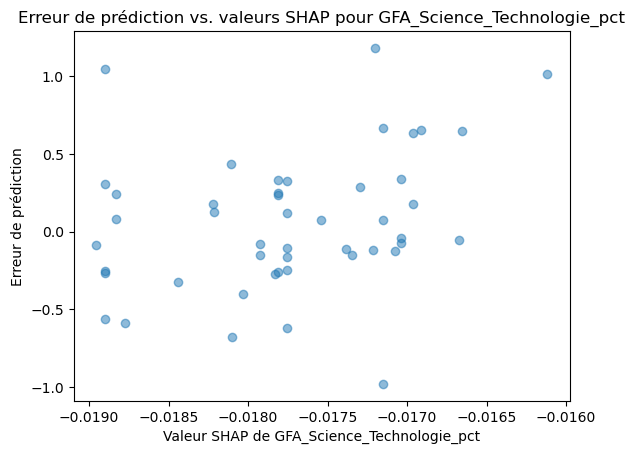

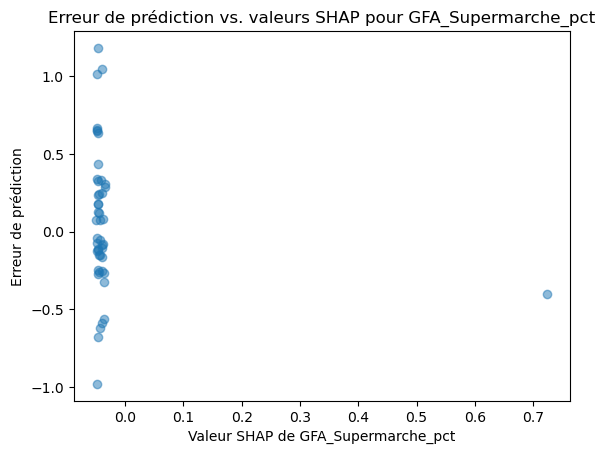

In [96]:
for feature in X_test.columns:
    plt.figure()
    plt.scatter(shap_df[feature], shap_df['prediction_error'], alpha=0.5)
    plt.title(f'Erreur de prédiction vs. valeurs SHAP pour {feature}')
    plt.xlabel(f'Valeur SHAP de {feature}')
    plt.ylabel('Erreur de prédiction')
    plt.show()


In [97]:
# Colonne pour indiquer si l'erreur est positive ou négative
shap_df['error_sign'] = np.sign(shap_df['prediction_error'])

# Calculer la moyenne des valeurs SHAP pour les erreurs positives et négatives
mean_shap_positive_error = shap_df[shap_df['error_sign'] > 0].mean()
mean_shap_negative_error = shap_df[shap_df['error_sign'] < 0].mean()

# Afficher les moyennes pour chaque caractéristique
print("Moyenne des valeurs SHAP pour les erreurs positives:")
print(mean_shap_positive_error)
print("\nMoyenne des valeurs SHAP pour les erreurs négatives:")
print(mean_shap_negative_error)


Moyenne des valeurs SHAP pour les erreurs positives:
NumberofBuildings                        -0.003796
NumberofFloors                           -0.000847
PropertyGFATotal                         -0.170587
BuildingAge                               0.017939
NumberOfPropertyUseTypes                  0.002870
SteamUse_pct                             -0.029413
Electricity_pct                           0.009315
NaturalGas_pct                            0.024405
GFA_Parking_pct                           0.006130
GFA_Residence_pct                        -0.003043
GFA_Loisirs_Shopping_ServicesPerso_pct    0.001466
GFA_Autres_Services_pct                  -0.088949
GFA_Autres_pct                            0.012028
GFA_Education_pct                         0.013436
GFA_Commerce_detail_pct                  -0.004246
GFA_Bureau_pct                            0.014211
GFA_Entrepot_nr_pct                       0.088363
GFA_Sante_pct                            -0.014691
GFA_Bureau_specialise_pct    

In [98]:
for feature in X_test.columns:
    # Identifier les instances avec les valeurs SHAP les plus élevées pour la caractéristique
    high_shap_values = shap_df[feature].nlargest(10)  # les 10 valeurs SHAP les plus élevées
    high_shap_indices = high_shap_values.index  # obtenir les indices de ces valeurs
    high_shap_observations = X_test.loc[high_shap_indices]  # obtenir les observations correspondantes
    print(f'Observations avec les valeurs SHAP les plus élevées pour {feature}:')
    print(high_shap_observations)


Observations avec les valeurs SHAP les plus élevées pour NumberofBuildings:
      NumberofBuildings  NumberofFloors  PropertyGFATotal  BuildingAge  \
306                 3.0               2             81336           22   
1083                5.0               1             87458           50   
1122                1.0               1             20616           11   
588                 1.0               3             23241            7   
534                 1.0               1             20233           18   
596                 1.0               2             49280          116   
1134                1.0               1             18258           78   
493                 1.0               1             22180           92   
1086                1.0               1             21400           48   
541                 1.0               5             33740           15   

      NumberOfPropertyUseTypes  SteamUse_pct  Electricity_pct  NaturalGas_pct  \
306                         

In [99]:
# Chargez la bibliothèque JavaScript SHAP pour Jupyter Notebook
shap.initjs()

# Ensuite, créez le force plot pour le premier échantillon
shap.force_plot(
    explainer.expected_value, shap_values[0,:], X_test.iloc[100,:],
    feature_names=X_test.columns
)


In [100]:
# Sur l'ensemble
shap.force_plot(explainer.expected_value, shap_values, X_test, feature_names=X_test.columns)


In [101]:
# Calculer les valeurs SHAP pour l'ensemble de test
shap_values = explainer.shap_values(X_test)

top_errors_indices = df_errors_sorted.head(15).index
indices_numériques = [X_test.index.get_loc(ind) for ind in top_errors_indices if ind in X_test.index]

# Sélectionnez le sous-ensemble des valeurs SHAP pour ces indices numériques
shap_values_subset = shap_values[indices_numériques]

# Maintenant, sélectionnez les observations correspondantes dans X_test_scaled
X_test_subset = X_test.loc[top_errors_indices]

# Affichage du force plot pour le sous-ensemble sélectionné
shap.force_plot(explainer.expected_value, shap_values_subset, X_test_subset)


# Analyse de l'influance de l'Energy Star Score

## Test avec l'Energy Star Score

In [102]:
# Sélection des données
df_nrjstar = df.dropna(subset=['ENERGYSTARScore'])
df_nrjstar.shape

(725, 27)

### Importance des features

#### Data preparation

In [180]:
# Sélection des variables explicatives et des variables cibles
features = df_nrjstar.drop(['TotalGHGEmissions', 'SiteEnergyUseWN(kBtu)', 'Log_TotalGHGEmissions', 'Log_SiteEnergyUseWN'], axis=1)
target = df_nrjstar['Log_TotalGHGEmissions']

In [181]:
features.head(1)

NumberofBuildings  NumberofFloors  PropertyGFATotal  ENERGYSTARScore  \
0                1.0              12             88434             60.0   

   BuildingAge  NumberOfPropertyUseTypes  SteamUse_pct  Electricity_pct  \
0           89                         1      26.87282        52.917723   

   NaturalGas_pct  GFA_Parking_pct  GFA_Residence_pct  \
0        17.11772              0.0              100.0   

   GFA_Loisirs_Shopping_ServicesPerso_pct  GFA_Autres_Services_pct  \
0                                     0.0                      0.0   

   GFA_Autres_pct  GFA_Education_pct  GFA_Commerce_detail_pct  GFA_Bureau_pct  \
0             0.0                0.0                      0.0             0.0   

   GFA_Entrepot_nr_pct  GFA_Sante_pct  GFA_Bureau_specialise_pct  \
0                  0.0            0.0                        0.0   

   GFA_Restauration_Divertissement_pct  GFA_Science_Technologie_pct  \
0                                  0.0                          0.0   

   GFA_Supermarche_pct  
0                  0.0

#### Séparation des données

In [182]:
# Séparation des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Conservez les noms des colonnes dans une variable avant la mise à l'échelle
column_names = X_train.columns

# Affichage des dimensions des ensembles d'entraînement et de test
X_train.shape, X_test.shape

((580, 23), (145, 23))

In [183]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 580 entries, 638 to 146
Data columns (total 23 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   NumberofBuildings                       580 non-null    float64
 1   NumberofFloors                          580 non-null    int64  
 2   PropertyGFATotal                        580 non-null    int64  
 3   ENERGYSTARScore                         580 non-null    float64
 4   BuildingAge                             580 non-null    int64  
 5   NumberOfPropertyUseTypes                580 non-null    int64  
 6   SteamUse_pct                            580 non-null    float64
 7   Electricity_pct                         580 non-null    float64
 8   NaturalGas_pct                          580 non-null    float64
 9   GFA_Parking_pct                         580 non-null    float64
 10  GFA_Residence_pct                       580 non-null    float64
 

In [184]:
X_train.head()

NumberofBuildings  NumberofFloors  PropertyGFATotal  ENERGYSTARScore  \
638                1.0               3             39927             38.0   
7                  1.0              11            153163             30.0   
606                1.0               2             21128             97.0   
889                1.0               2             21200             15.0   
580                1.0               1             36444             80.0   

     BuildingAge  NumberOfPropertyUseTypes  SteamUse_pct  Electricity_pct  \
638           42                         2      0.000000        93.117487   
7             47                         1     31.460248        37.169778   
606           57                         1      0.000000        99.999979   
889           18                         2      0.000000       100.000000   
580           56                         1      0.000000        95.188896   

     NaturalGas_pct  GFA_Parking_pct  GFA_Residence_pct  \
638        0.000000         0.000000           0.000000   
7         27.583765        12.587244          87.412756   
606        0.000000         0.000000           0.000000   
889        0.000000         0.000000           0.000000   
580        0.000000         0.000000           0.000000   

     GFA_Loisirs_Shopping_ServicesPerso_pct  GFA_Autres_Services_pct  \
638                                     0.0                      0.0   
7                                       0.0                      0.0   
606                                     0.0                      0.0   
889                                     0.0                      0.0   
580                                     0.0                      0.0   

     GFA_Autres_pct  GFA_Education_pct  GFA_Commerce_detail_pct  \
638        0.966764                0.0                 0.000000   
7          0.000000                0.0                 0.000000   
606        0.000000                0.0                 0.000000   
889        0.000000                0.0                66.830189   
580        0.000000                0.0                 0.000000   

     GFA_Bureau_pct  GFA_Entrepot_nr_pct  GFA_Sante_pct  \
638       99.033236                  0.0            0.0   
7          0.000000                  0.0            0.0   
606      100.000000                  0.0            0.0   
889       33.169811                  0.0            0.0   
580        0.000000                100.0            0.0   

     GFA_Bureau_specialise_pct  GFA_Restauration_Divertissement_pct  \
638                        0.0                                  0.0   
7                          0.0                                  0.0   
606                        0.0                                  0.0   
889                        0.0                                  0.0   
580                        0.0                                  0.0   

     GFA_Science_Technologie_pct  GFA_Supermarche_pct  
638                          0.0                  0.0  
7                            0.0                  0.0  
606                          0.0                  0.0  
889                          0.0                  0.0  
580                          0.0                  0.0

In [185]:
y_train.head()

638    3.214064
7      6.538516
606    1.111858
889    2.458734
580    0.113329
Name: Log_TotalGHGEmissions, dtype: float64

#### Standardisation

In [186]:
# Initialisation du StandardScaler
scaler = StandardScaler()

In [187]:
# Normalisation des ensembles d'entraînement et de test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Affichage des premières lignes des données normalisées pour vérification
X_train_scaled_df = pd.DataFrame(X_train_scaled, index=X_train.index, columns=column_names)
X_train_scaled_df.head(5)

NumberofBuildings  NumberofFloors  PropertyGFATotal  ENERGYSTARScore  \
638          -0.088885       -0.208439         -0.361989        -0.917038   
7            -0.088885        1.081104          0.228270        -1.202689   
606          -0.088885       -0.369632         -0.459982         1.189638   
889          -0.088885       -0.369632         -0.459607        -1.738285   
580          -0.088885       -0.530825         -0.380145         0.582629   

     BuildingAge  NumberOfPropertyUseTypes  SteamUse_pct  Electricity_pct  \
638    -0.451947                  0.517505     -0.234397         0.924016   
7      -0.292093                 -0.722797      3.420266        -1.120001   
606     0.027616                 -0.722797     -0.234397         1.175463   
889    -1.219248                  0.517505     -0.234397         1.175464   
580    -0.004355                 -0.722797     -0.234397         0.999693   

     NaturalGas_pct  GFA_Parking_pct  GFA_Residence_pct  \
638       -1.052039        -0.359810          -0.281954   
7          0.107293         1.017538           3.546663   
606       -1.052039        -0.359810          -0.281954   
889       -1.052039        -0.359810          -0.281954   
580       -1.052039        -0.359810          -0.281954   

     GFA_Loisirs_Shopping_ServicesPerso_pct  GFA_Autres_Services_pct  \
638                               -0.065082                -0.379602   
7                                 -0.065082                -0.379602   
606                               -0.065082                -0.379602   
889                               -0.065082                -0.379602   
580                               -0.065082                -0.379602   

     GFA_Autres_pct  GFA_Education_pct  GFA_Commerce_detail_pct  \
638       -0.147786          -0.268631                -0.327182   
7         -0.238341          -0.268631                -0.327182   
606       -0.238341          -0.268631                -0.327182   
889       -0.238341          -0.268631                 2.418859   
580       -0.238341          -0.268631                -0.327182   

     GFA_Bureau_pct  GFA_Entrepot_nr_pct  GFA_Sante_pct  \
638        1.679813            -0.554327      -0.149799   
7         -0.787685            -0.554327      -0.149799   
606        1.703901            -0.554327      -0.149799   
889        0.038770            -0.554327      -0.149799   
580       -0.787685             2.050971      -0.149799   

     GFA_Bureau_specialise_pct  GFA_Restauration_Divertissement_pct  \
638                  -0.203529                            -0.151915   
7                    -0.203529                            -0.151915   
606                  -0.203529                            -0.151915   
889                  -0.203529                            -0.151915   
580                  -0.203529                            -0.151915   

     GFA_Science_Technologie_pct  GFA_Supermarche_pct  
638                    -0.064673            -0.216399  
7                      -0.064673            -0.216399  
606                    -0.064673            -0.216399  
889                    -0.064673            -0.216399  
580                    -0.064673            -0.216399

#### Test de Student

In [188]:
# Ajout d'une constante à X pour le terme d'interception
X_train_const = sm.add_constant(X_train_scaled_df)

# Ajuster le modèle de régression linéaire avec statsmodels
model = sm.OLS(y_train, X_train_const).fit()

# Obtenir et afficher le résumé du modèle
summary = model.summary()
print(summary)

                              OLS Regression Results                             
Dep. Variable:     Log_TotalGHGEmissions   R-squared:                       0.780
Model:                               OLS   Adj. R-squared:                  0.771
Method:                    Least Squares   F-statistic:                     85.66
Date:                   Mon, 04 Mar 2024   Prob (F-statistic):          6.23e-166
Time:                           12:51:22   Log-Likelihood:                -590.65
No. Observations:                    580   AIC:                             1229.
Df Residuals:                        556   BIC:                             1334.
Df Model:                             23                                         
Covariance Type:               nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------

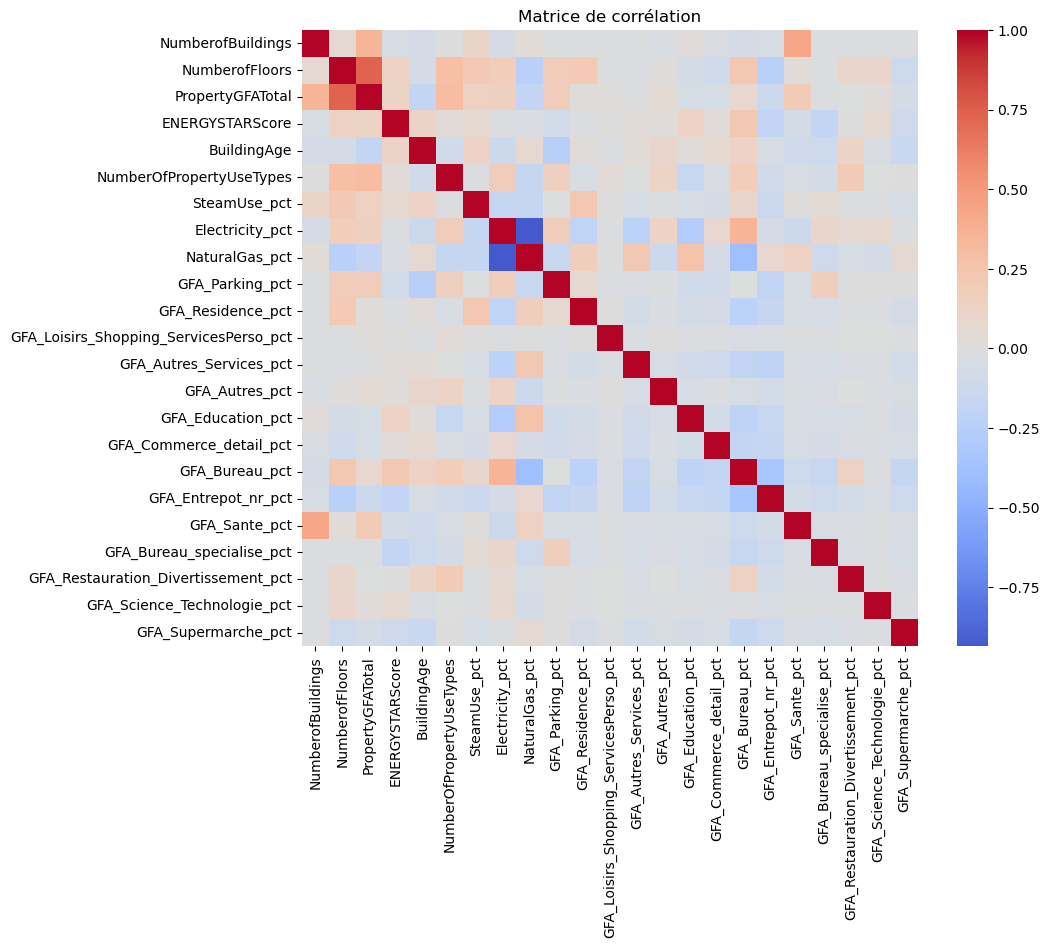

In [189]:
# Calcul de la matrice de corrélation
corr_matrix = X_train_scaled_df.corr()

# Création d'une heatmap avec seaborn
plt.figure(figsize=(10, 8))

sns.heatmap(corr_matrix, annot=False, fmt=".2f", cmap='coolwarm', cbar=True, square=True, center=0)

# Titre et affichage du graphique
plt.title('Matrice de corrélation')
plt.show()

### Tests de modèles

#### Data preparation

In [218]:
# Sélection des variables explicatives et des variables cibles
features = df_nrjstar.drop(['TotalGHGEmissions', 'SiteEnergyUseWN(kBtu)', 'Log_TotalGHGEmissions', 'Log_SiteEnergyUseWN'], axis=1)
target = df_nrjstar['Log_TotalGHGEmissions']

# Transformation des variables catégorielles en variables numériques (encodage one-hot)
features = pd.get_dummies(features)

In [219]:
features.head(1)

NumberofBuildings  NumberofFloors  PropertyGFATotal  ENERGYSTARScore  \
0                1.0              12             88434             60.0   

   BuildingAge  NumberOfPropertyUseTypes  SteamUse_pct  Electricity_pct  \
0           89                         1      26.87282        52.917723   

   NaturalGas_pct  GFA_Parking_pct  GFA_Residence_pct  \
0        17.11772              0.0              100.0   

   GFA_Loisirs_Shopping_ServicesPerso_pct  GFA_Autres_Services_pct  \
0                                     0.0                      0.0   

   GFA_Autres_pct  GFA_Education_pct  GFA_Commerce_detail_pct  GFA_Bureau_pct  \
0             0.0                0.0                      0.0             0.0   

   GFA_Entrepot_nr_pct  GFA_Sante_pct  GFA_Bureau_specialise_pct  \
0                  0.0            0.0                        0.0   

   GFA_Restauration_Divertissement_pct  GFA_Science_Technologie_pct  \
0                                  0.0                          0.0   

   GFA_Supermarche_pct  
0                  0.0

In [220]:
# Séparation des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Conservez les noms des colonnes dans une variable avant la mise à l'échelle
column_names = X_train.columns

# Affichage des dimensions des ensembles d'entraînement et de test
X_train.shape, X_test.shape

((580, 23), (145, 23))

In [221]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 580 entries, 638 to 146
Data columns (total 23 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   NumberofBuildings                       580 non-null    float64
 1   NumberofFloors                          580 non-null    int64  
 2   PropertyGFATotal                        580 non-null    int64  
 3   ENERGYSTARScore                         580 non-null    float64
 4   BuildingAge                             580 non-null    int64  
 5   NumberOfPropertyUseTypes                580 non-null    int64  
 6   SteamUse_pct                            580 non-null    float64
 7   Electricity_pct                         580 non-null    float64
 8   NaturalGas_pct                          580 non-null    float64
 9   GFA_Parking_pct                         580 non-null    float64
 10  GFA_Residence_pct                       580 non-null    float64
 

In [222]:
X_train.head()

NumberofBuildings  NumberofFloors  PropertyGFATotal  ENERGYSTARScore  \
638                1.0               3             39927             38.0   
7                  1.0              11            153163             30.0   
606                1.0               2             21128             97.0   
889                1.0               2             21200             15.0   
580                1.0               1             36444             80.0   

     BuildingAge  NumberOfPropertyUseTypes  SteamUse_pct  Electricity_pct  \
638           42                         2      0.000000        93.117487   
7             47                         1     31.460248        37.169778   
606           57                         1      0.000000        99.999979   
889           18                         2      0.000000       100.000000   
580           56                         1      0.000000        95.188896   

     NaturalGas_pct  GFA_Parking_pct  GFA_Residence_pct  \
638        0.000000         0.000000           0.000000   
7         27.583765        12.587244          87.412756   
606        0.000000         0.000000           0.000000   
889        0.000000         0.000000           0.000000   
580        0.000000         0.000000           0.000000   

     GFA_Loisirs_Shopping_ServicesPerso_pct  GFA_Autres_Services_pct  \
638                                     0.0                      0.0   
7                                       0.0                      0.0   
606                                     0.0                      0.0   
889                                     0.0                      0.0   
580                                     0.0                      0.0   

     GFA_Autres_pct  GFA_Education_pct  GFA_Commerce_detail_pct  \
638        0.966764                0.0                 0.000000   
7          0.000000                0.0                 0.000000   
606        0.000000                0.0                 0.000000   
889        0.000000                0.0                66.830189   
580        0.000000                0.0                 0.000000   

     GFA_Bureau_pct  GFA_Entrepot_nr_pct  GFA_Sante_pct  \
638       99.033236                  0.0            0.0   
7          0.000000                  0.0            0.0   
606      100.000000                  0.0            0.0   
889       33.169811                  0.0            0.0   
580        0.000000                100.0            0.0   

     GFA_Bureau_specialise_pct  GFA_Restauration_Divertissement_pct  \
638                        0.0                                  0.0   
7                          0.0                                  0.0   
606                        0.0                                  0.0   
889                        0.0                                  0.0   
580                        0.0                                  0.0   

     GFA_Science_Technologie_pct  GFA_Supermarche_pct  
638                          0.0                  0.0  
7                            0.0                  0.0  
606                          0.0                  0.0  
889                          0.0                  0.0  
580                          0.0                  0.0

#### Standardisation

In [223]:
# Initialisation du StandardScaler
scaler = StandardScaler()

In [224]:
# Normalisation des ensembles d'entraînement et de test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Affichage des premières lignes des données normalisées pour vérification
X_train_scaled_df = pd.DataFrame(X_train_scaled, index=X_train.index, columns=column_names)
X_train_scaled_df.head(5)

NumberofBuildings  NumberofFloors  PropertyGFATotal  ENERGYSTARScore  \
638          -0.088885       -0.208439         -0.361989        -0.917038   
7            -0.088885        1.081104          0.228270        -1.202689   
606          -0.088885       -0.369632         -0.459982         1.189638   
889          -0.088885       -0.369632         -0.459607        -1.738285   
580          -0.088885       -0.530825         -0.380145         0.582629   

     BuildingAge  NumberOfPropertyUseTypes  SteamUse_pct  Electricity_pct  \
638    -0.451947                  0.517505     -0.234397         0.924016   
7      -0.292093                 -0.722797      3.420266        -1.120001   
606     0.027616                 -0.722797     -0.234397         1.175463   
889    -1.219248                  0.517505     -0.234397         1.175464   
580    -0.004355                 -0.722797     -0.234397         0.999693   

     NaturalGas_pct  GFA_Parking_pct  GFA_Residence_pct  \
638       -1.052039        -0.359810          -0.281954   
7          0.107293         1.017538           3.546663   
606       -1.052039        -0.359810          -0.281954   
889       -1.052039        -0.359810          -0.281954   
580       -1.052039        -0.359810          -0.281954   

     GFA_Loisirs_Shopping_ServicesPerso_pct  GFA_Autres_Services_pct  \
638                               -0.065082                -0.379602   
7                                 -0.065082                -0.379602   
606                               -0.065082                -0.379602   
889                               -0.065082                -0.379602   
580                               -0.065082                -0.379602   

     GFA_Autres_pct  GFA_Education_pct  GFA_Commerce_detail_pct  \
638       -0.147786          -0.268631                -0.327182   
7         -0.238341          -0.268631                -0.327182   
606       -0.238341          -0.268631                -0.327182   
889       -0.238341          -0.268631                 2.418859   
580       -0.238341          -0.268631                -0.327182   

     GFA_Bureau_pct  GFA_Entrepot_nr_pct  GFA_Sante_pct  \
638        1.679813            -0.554327      -0.149799   
7         -0.787685            -0.554327      -0.149799   
606        1.703901            -0.554327      -0.149799   
889        0.038770            -0.554327      -0.149799   
580       -0.787685             2.050971      -0.149799   

     GFA_Bureau_specialise_pct  GFA_Restauration_Divertissement_pct  \
638                  -0.203529                            -0.151915   
7                    -0.203529                            -0.151915   
606                  -0.203529                            -0.151915   
889                  -0.203529                            -0.151915   
580                  -0.203529                            -0.151915   

     GFA_Science_Technologie_pct  GFA_Supermarche_pct  
638                    -0.064673            -0.216399  
7                      -0.064673            -0.216399  
606                    -0.064673            -0.216399  
889                    -0.064673            -0.216399  
580                    -0.064673            -0.216399

#### Test multi modèles

In [225]:
# Liste de modèles à évaluer
models = [
    ('DummyRegressorMedian', DummyRegressor(strategy='median')),
    ('LinearRegression', LinearRegression()),
    ('Ridge', Ridge()),
    ('Lasso', Lasso()),
    ('ElasticNet', ElasticNet(random_state=0)),
    ('RandomForest', RandomForestRegressor(random_state=0)),
    ('GradientBoostingReg', GradientBoostingRegressor(random_state=0)),
    ('XGBoostReg', XGBRegressor(random_state=0)),
    ('SVR', SVR()),
    ('AdaBoostReg', AdaBoostRegressor(random_state=0))
]

# Tableau pour collecter les résultats
results = []

# Évaluer chaque modèle
for name, model in models:
    # Entraîner le modèle
    start_time = time.time() 
    model.fit(X_train_scaled, y_train)
    end_time = time.time()  # Enregistre le temps de fin
    duration = end_time - start_time  # Calcule la durée
    
    # Prédire sur l'ensemble de test
    y_pred = model.predict(X_test_scaled)
    
    # Calculer les métriques
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # RMSE CV
    scores_rmse = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
    rmse_cv = np.sqrt(-scores_rmse).mean()
    
    # R2 CV
    scores_r2 = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='r2')
    r2_cv = scores_r2.mean()
    r2_cv_std = scores_r2.std() 
    
    results.append((name, rmse, mae, r2, rmse_cv, r2_cv, r2_cv_std, duration))


In [226]:
# Convertir les résultats en DataFrame
df_results = pd.DataFrame(results, columns=['Modèle', 'RMSE', 'MAE', 'R2', 'RMSE CV', 'R2 CV', 'R2 CV Std', 'Temps de calcul'])
df_sorted_by_performance = df_results.sort_values(by=['R2 CV'], ascending=[False])

df_sorted_by_performance

Modèle      RMSE       MAE        R2   RMSE CV     R2 CV  \
6   GradientBoostingReg  0.413253  0.333547  0.919689  0.428196  0.907699   
7            XGBoostReg  0.446857  0.345366  0.906097  0.479541  0.884523   
5          RandomForest  0.473357  0.351275  0.894629  0.500648  0.873921   
9           AdaBoostReg  0.618971  0.494452  0.819830  0.615914  0.809599   
8                   SVR  0.563677  0.431959  0.850582  0.674880  0.771333   
2                 Ridge  0.676860  0.512398  0.784553  0.733603  0.731099   
1      LinearRegression  0.672447  0.511082  0.787353  0.735025  0.729843   
4            ElasticNet  1.340634  1.090714  0.154792  1.329902  0.118789   
0  DummyRegressorMedian  1.470226  1.191180 -0.016509  1.431848 -0.021318   
3                 Lasso  1.465834  1.188272 -0.010445  1.432835 -0.022959   

   R2 CV Std  Temps de calcul  
6   0.020124         0.154043  
7   0.024006         0.087021  
5   0.026548         0.465327  
9   0.028780         0.079019  
8   0.037505         0.013004  
2   0.038013         0.001001  
1   0.042198         0.000000  
4   0.019508         0.000000  
0   0.017727         0.000000  
3   0.023366         0.001000

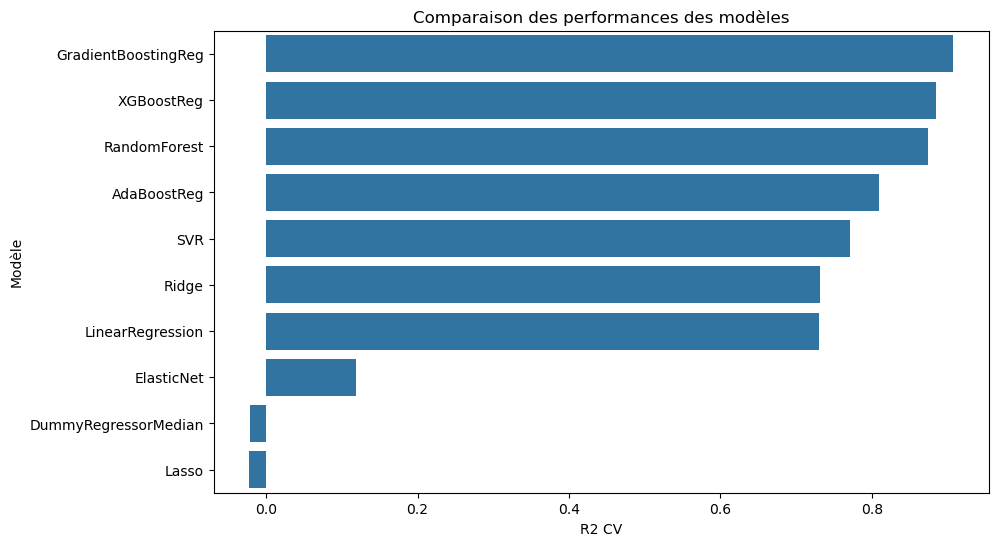

In [227]:
plt.figure(figsize=(10, 6))
sns.barplot(x='R2 CV', y='Modèle', data=df_sorted_by_performance)
plt.title('Comparaison des performances des modèles')
plt.show()

Les modèles Gradient Boosting Regressor est supérieur aux autres si on regarde le R² avec CV.

### Optimisation du GradientBoostingReg

#### Le modèle de base

In [228]:
# Création du modèle Gradient Boosting
gb_model = GradientBoostingRegressor()

# Entraînement du modèle sur les données d'entraînement
gb_model.fit(X_train_scaled, y_train)

# Prédiction sur le jeu de test
y_pred_gb = gb_model.predict(X_test_scaled)

# Calcul des métriques pour le meilleur modèle
rmse_base = np.sqrt(mean_squared_error(y_test, y_pred_gb))
r2_base = r2_score(y_test, y_pred_gb)
mae_base = mean_absolute_error(y_test, y_pred_gb)

print("Métriques pour le modèle GBR :")
print("RMSE :", rmse_base)
print("R² :", r2_base)
print("MAE :", mae_base)

Métriques pour le modèle GBR :
RMSE : 0.41100206168289244
R² : 0.9205615056074029
MAE : 0.331764862243021


In [229]:
importances_gb = gb_model.feature_importances_

# Création d'un DataFrame pour afficher l'importance des variables
features_gb = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances_gb})
features_gb = features_gb.sort_values(by='Importance', ascending=False)

# Tri des caractéristiques par importance croissante
features_gb = features_gb.sort_values('Importance', ascending=False)

print(features_gb)

                                   Feature  Importance
2                         PropertyGFATotal    0.435959
7                          Electricity_pct    0.298205
17                     GFA_Entrepot_nr_pct    0.064868
8                           NaturalGas_pct    0.050968
3                          ENERGYSTARScore    0.045467
22                     GFA_Supermarche_pct    0.037256
1                           NumberofFloors    0.013944
0                        NumberofBuildings    0.013830
21             GFA_Science_Technologie_pct    0.013553
12                 GFA_Autres_Services_pct    0.008915
6                             SteamUse_pct    0.006248
15                 GFA_Commerce_detail_pct    0.002850
18                           GFA_Sante_pct    0.002351
4                              BuildingAge    0.002175
9                          GFA_Parking_pct    0.001091
16                          GFA_Bureau_pct    0.000794
13                          GFA_Autres_pct    0.000720
14        

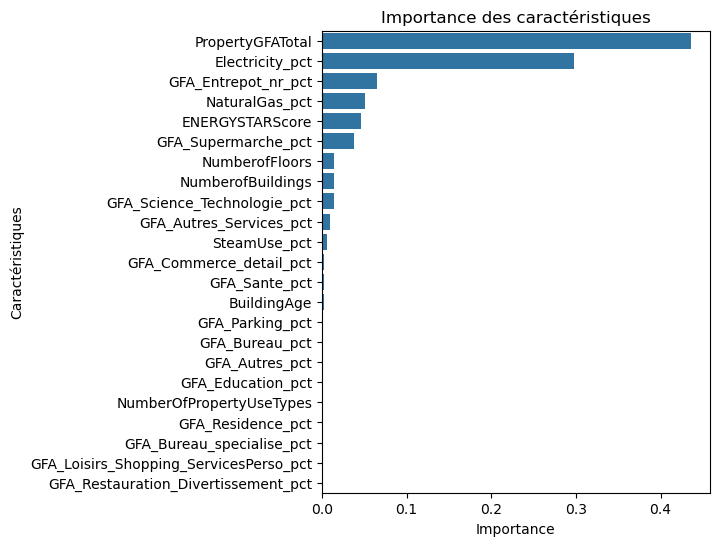

In [230]:
plt.figure(figsize=(5,6))
sns.barplot(x="Importance", y="Feature", data=features_gb)
plt.title('Importance des caractéristiques')
plt.xlabel('Importance')
plt.ylabel('Caractéristiques')
plt.show()

#### Recherche des hyperparamètres

In [231]:
# Définition des hyperparamètres à tester
param_dist = {
    'n_estimators': np.arange(50, 500, 10),
    'learning_rate': np.linspace(0.008, 0.2, 20),
    'max_depth': np.arange(2, 10, 1),
    'min_samples_split': np.arange(2, 10, 1),
    'min_samples_leaf': np.arange(1, 5, 1),
    'subsample': np.linspace(0.3, 0.9, 20)
}

# Initialisation de la recherche aléatoire
random_search = RandomizedSearchCV(GradientBoostingRegressor(), param_distributions=param_dist, n_iter=100, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Exécution de la recherche aléatoire sur le jeu d'entraînement
random_search.fit(X_train_scaled, y_train)

# Récupération du meilleur modèle
best_gb_model = random_search.best_estimator_

# Affichage des meilleurs paramètres et du meilleur score
print("Meilleurs hyperparamètres (RandomizedSearchCV) pour GBR: ", random_search.best_params_)
meilleur_score_rmse_bgr = np.sqrt(-random_search.best_score_) 
print("Meilleur score (RMSE) pour GBR: ", meilleur_score_rmse_bgr)

Meilleurs hyperparamètres (RandomizedSearchCV) pour GBR:  {'subsample': 0.868421052631579, 'n_estimators': 400, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_depth': 2, 'learning_rate': 0.12926315789473686}
Meilleur score (RMSE) pour GBR:  0.387556602819408


In [232]:
# Définition de la grille d'hyperparamètres
param_grid = {
    'learning_rate': [0.06, 0.08, 0.13],
    'max_depth': [2, 3],
    'min_samples_leaf': [1, 2],
    'min_samples_split': [3, 7, 9],
    'n_estimators': [270, 340, 400],
    'subsample': [0.33, 0.36]
}

# Configuration de GridSearchCV
grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)

# Exécution de la recherche d'hyperparamètres
grid_search.fit(X_train_scaled, y_train)

# Affichage des meilleurs paramètres
print("Meilleurs paramètres :", grid_search.best_params_)

# Prédiction avec le meilleur modèle
y_pred = grid_search.best_estimator_.predict(X_test_scaled)

# Calcul des métriques pour le meilleur modèle
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
smape = 100 * np.mean(2 * np.abs(y_pred - y_test) / (np.abs(y_pred) + np.abs(y_test)))

print("RMSE avec GridSearchCV pour GBR: {:.4f}".format(rmse))
print("MAE avec GridSearchCV pour GBR: {:.4f}".format(mae))
print("R2 avec GridSearchCV pour GBR: {:.4f}".format(r2))
print("SMAPE avec GridSearchCV pour GBR: {:.4f}%".format(smape))


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Meilleurs paramètres : {'learning_rate': 0.06, 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 9, 'n_estimators': 400, 'subsample': 0.33}
RMSE avec GridSearchCV pour GBR: 0.3499
MAE avec GridSearchCV pour GBR: 0.2643
R2 avec GridSearchCV pour GBR: 0.9424
SMAPE avec GridSearchCV pour GBR: 9.6901%


In [233]:
# Meilleurs hyperparamètres obtenus de GridSearchCV
best_params = grid_search.best_params_

# Configuration du modèle avec les meilleurs hyperparamètres
best_gb_model = GradientBoostingRegressor(
    n_estimators=best_params['n_estimators'],
    learning_rate=best_params['learning_rate'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    subsample=best_params['subsample'],
    random_state=0
)

# Métriques à évaluer lors de la validation croisée
scoring_metrics = ['neg_mean_squared_error', 'r2', 'neg_mean_absolute_error']

# Exécution de la validation croisée (5 plis)
cv_results = cross_validate(best_gb_model, X_train_scaled, y_train, cv=5, scoring=scoring_metrics, return_train_score=True)

# Calcul et affichage des métriques moyennes pour chaque pli
rmse_scores = np.sqrt(-cv_results['test_neg_mean_squared_error'])
r2_scores = cv_results['test_r2']
mae_scores = -cv_results['test_neg_mean_absolute_error']

# Affichage avec écart type
print(f"Validation Croisée RMSE: {rmse_scores.mean():.4f} (± {rmse_scores.std():.4f})")
print(f"Validation Croisée MAE: {mae_scores.mean():.4f} (± {mae_scores.std():.4f})")
print(f"Validation Croisée R²: {r2_scores.mean():.4f} (± {r2_scores.std():.4f})")

Validation Croisée RMSE: 0.3650 (± 0.0410)
Validation Croisée MAE: 0.2741 (± 0.0168)
Validation Croisée R²: 0.9334 (± 0.0116)


In [234]:
best_gb_model.fit(X_train_scaled, y_train) 

# Prédictions sur l'ensemble d'entraînement
y_train_pred = best_gb_model.predict(X_train_scaled)

# Prédictions sur l'ensemble de test
y_test_pred = best_gb_model.predict(X_test_scaled)

# Calcul des métriques pour l'ensemble d'entraînement
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_r2 = r2_score(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)

# Calcul des métriques pour l'ensemble de test
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_r2 = r2_score(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

# Affichage des métriques
print("Ensemble d'entraînement : RMSE = {:.4f}, R² = {:.4f}, MAE = {:.4f}".format(train_rmse, train_r2, train_mae))
print("Ensemble de test : RMSE = {:.4f}, R² = {:.4f}, MAE = {:.4f}".format(test_rmse, test_r2, test_mae))

Ensemble d'entraînement : RMSE = 0.2325, R² = 0.9735, MAE = 0.1837
Ensemble de test : RMSE = 0.3634, R² = 0.9379, MAE = 0.2807


### Analyse des erreurs

#### Avec les cibles en log

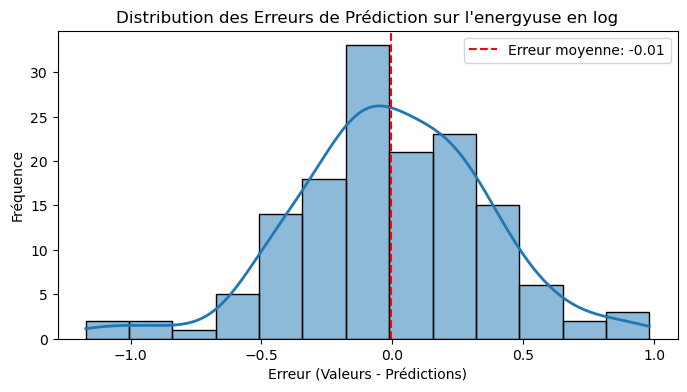

In [235]:
# Calcul des erreurs
errors = y_test - y_test_pred

# Calcul de l'erreur moyenne
mean_error = np.mean(errors)

# Visualisation de la distribution des erreurs
# Couleurs de la palette tab10
colors_tab10 = plt.cm.tab10(np.arange(10))
plt.figure(figsize=(8, 4))
sns.histplot(errors, kde=True, color=colors_tab10[0], line_kws={'color': colors_tab10[1], 'linewidth': 2})
plt.axvline(mean_error, color='red', linestyle='--', label=f'Erreur moyenne: {mean_error:.2f}')
plt.title('Distribution des Erreurs de Prédiction sur l\'energyuse en log')
plt.xlabel('Erreur (Valeurs - Prédictions)')
plt.ylabel('Fréquence')
plt.legend()

plt.show()

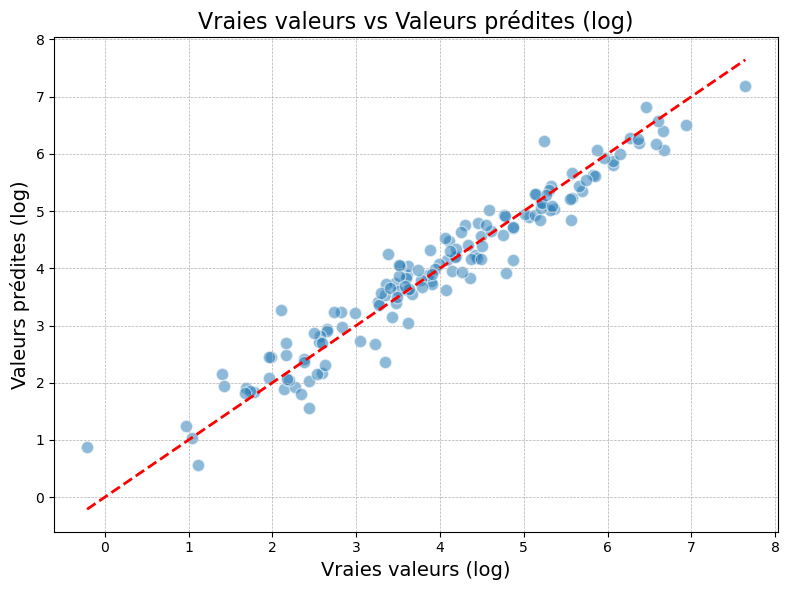

In [236]:
plt.figure(figsize=(8, 6))  # Augmenter la taille du graphique
plt.scatter(y_test, y_test_pred, alpha=0.5, edgecolors='w', s=80)  # Ajouter des bords blancs pour mieux distinguer les points superposés
plt.title('Vraies valeurs vs Valeurs prédites (log)', fontsize=16)
plt.xlabel('Vraies valeurs (log)', fontsize=14)
plt.ylabel('Valeurs prédites (log)', fontsize=14)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2, linestyle='--')  # Ligne y=x
plt.grid(True, which='major', linestyle='--', linewidth=0.5)  # Grille plus fine
plt.grid(True, which='minor', linestyle=':', linewidth=0.5, alpha=0.7)  # Grille mineure
plt.tight_layout()  # Ajuste automatiquement les sous-graphiques pour bien remplir la figure
plt.show()


#### Avec les valeurs réelles

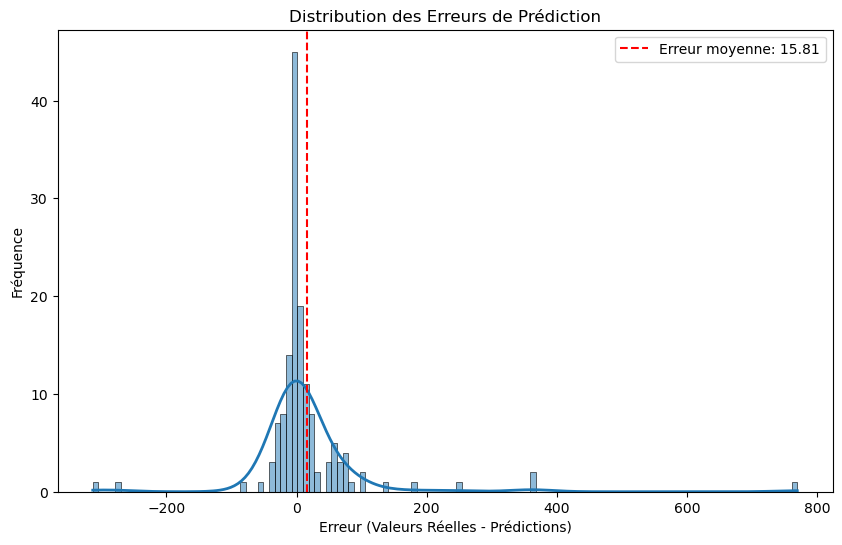

In [237]:
# Conversion des prédictions et des valeurs réelles de test de log à l'échelle originale
y_test_pred_original = np.exp(y_test_pred) 
y_test_original = np.exp(y_test)  

# Calcul des erreurs
errors = y_test_original - y_test_pred_original

# Calcul de l'erreur moyenne
mean_error = np.mean(errors)

# Visualisation de la distribution des erreurs
plt.figure(figsize=(10, 6))
sns.histplot(errors, kde=True, color=colors_tab10[0], line_kws={'color': colors_tab10[1], 'linewidth': 2})
plt.axvline(mean_error, color='red', linestyle='--', label=f'Erreur moyenne: {mean_error:.2f}')
plt.title('Distribution des Erreurs de Prédiction')
plt.xlabel('Erreur (Valeurs Réelles - Prédictions)')
plt.ylabel('Fréquence')
plt.legend()

plt.show()

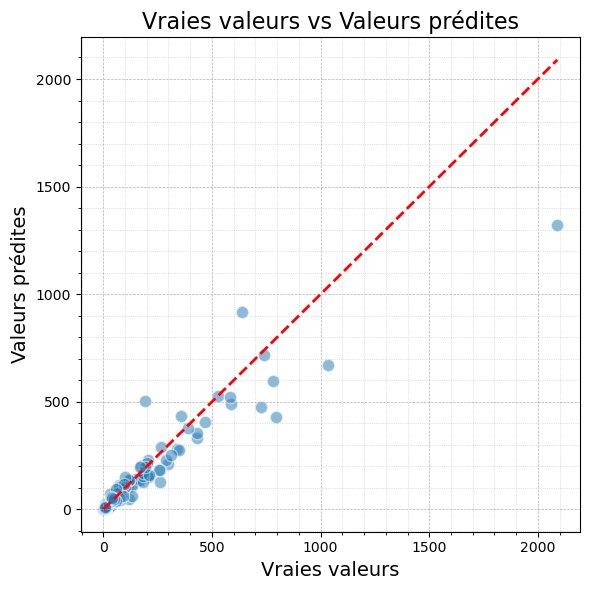

In [238]:
plt.figure(figsize=(6, 6)) 
plt.scatter(y_test_original, y_test_pred_original, alpha=0.5, edgecolors='w', s=80)  
plt.title('Vraies valeurs vs Valeurs prédites', fontsize=16)
plt.xlabel('Vraies valeurs', fontsize=14)
plt.ylabel('Valeurs prédites', fontsize=14)
plt.plot([min(y_test_original), max(y_test_original)], [min(y_test_original), max(y_test_original)], color='red', lw=2, linestyle='--')  # Ligne y=x
plt.grid(True, which='major', linestyle='--', linewidth=0.5) 
plt.minorticks_on() 
plt.grid(True, which='minor', linestyle=':', linewidth=0.5, alpha=0.7) 
plt.tight_layout() 
plt.show()

In [239]:
# Création d'un DataFrame avec les valeurs réelles et prédites
df_errors = pd.DataFrame({'Valeurs réelles': y_test_original, 'Valeurs prédites': y_test_pred_original})


# Calcul des erreurs absolues et ajout en tant que nouvelle colonne
df_errors['Erreurs absolues'] = abs(df_errors['Valeurs réelles'] - df_errors['Valeurs prédites'])

# Trier le DataFrame par les erreurs absolues de façon décroissante
df_errors_sorted = df_errors.sort_values('Erreurs absolues', ascending=False)

# Afficher les 15 erreurs les plus grandes
print(df_errors_sorted.head(15))

     Valeurs réelles  Valeurs prédites  Erreurs absolues
2            2089.28       1319.950857        769.329143
162           793.05        431.286491        361.763509
202          1032.63        671.453048        361.176952
394           189.85        503.051447        313.201447
350           639.72        915.232155        275.512155
65            723.47        477.371074        246.098926
104           780.84        597.295122        183.544878
841           260.32        126.177694        134.142306
128           429.27        330.706488         98.563512
153           588.90        491.150665         97.749335
73            297.43        211.894337         85.535663
476           355.80        434.430649         78.630649
41            262.75        185.379409         77.370591
13            349.32        275.020757         74.299243
40            430.84        356.962755         73.877245


In [240]:
indices_plus_gd_erreurs = df_errors_sorted.head(15).index
df_top_errors = df.loc[indices_plus_gd_erreurs]
df_top_errors

NumberofBuildings  NumberofFloors  PropertyGFATotal  ENERGYSTARScore  \
2                  1.0              41            956110             43.0   
162                1.0              30            755000             72.0   
202                1.0               7            351530             23.0   
394                1.0               6            320946             57.0   
350                1.0              27            216571             62.0   
65                 1.0               1            530039             98.0   
104                1.0               8            254273             29.0   
841                1.0               1             24377              6.0   
128                1.0              63           1354987             89.0   
153                1.0              55           1400000             92.0   
73                 1.0               1            234144             87.0   
476                1.0               9            104000              8.0   
41                 1.0               7             76631             71.0   
13                 1.0              10            104352             39.0   
40                 1.0               3            179014             48.0   

     SiteEnergyUseWN(kBtu)  TotalGHGEmissions  BuildingAge  \
2               73937112.0            2089.28           47   
162             53974556.0             793.05           31   
202             43178016.0            1032.63           16   
394             25585012.0             189.85          106   
350             17352520.0             639.72           87   
65              28763498.0             723.47           65   
104             26831896.0             780.84           13   
841             10133933.0             260.32           43   
128             61576184.0             429.27           26   
153             55140300.0             588.90           28   
73               7874958.5             297.43           79   
476              9037184.0             355.80           91   
41               7250730.5             262.75          108   
13              10154608.0             349.32          100   
40              16527711.0             430.84           51   

     NumberOfPropertyUseTypes  SteamUse_pct  Electricity_pct  NaturalGas_pct  \
2                           1     29.168781        66.984851        2.020366   
162                         5      0.962287        80.037644       15.760841   
202                         1      0.000000        62.026685       36.888513   
394                         2      0.000000        98.515037        1.040539   
350                         3     42.725126        50.164310        0.734458   
65                          2      0.000000        56.406662       39.955165   
104                         1      0.000000        51.295451       48.061084   
841                         1      0.000000        56.222920       40.987709   
128                         2      0.000000        99.999994        0.000000   
153                         4      3.952622        89.721733        2.587654   
73                          1      0.000000        16.721574       68.920998   
476                         2     39.598046        46.030069       10.537320   
41                          1      0.000000        36.655610       63.344390   
13                          1     33.786257        58.184127        8.029616   
40                          1      0.000000        59.196767       40.803233   

     GFA_Parking_pct  GFA_Residence_pct  \
2          20.574829          79.121963   
162        14.668136           0.000000   
202        41.101522           0.000000   
394         0.000000           0.000000   
350         6.150408           0.000000   
65          0.000000           0.000000   
104        12.286257          87.713743   
841         0.000000           0.000000   
128        10.438400           0.000000   
153        16.992657           0.000000   
73          0.000000     

In [241]:
# Initialiser l'explainer SHAP
explainer = shap.TreeExplainer(best_gb_model)

# Calculer les valeurs SHAP pour l'ensemble d'entraînement
shap_values = explainer.shap_values(X_test_scaled)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


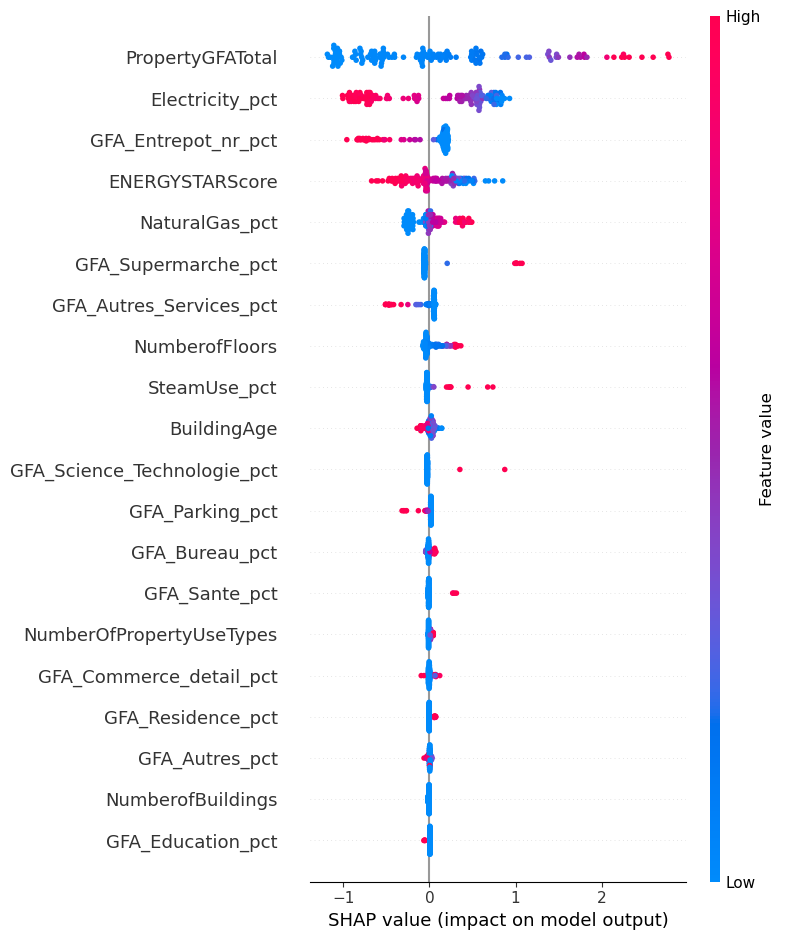

In [242]:
# Résumé de l'importance des caractéristiques
shap.summary_plot(shap_values, X_test_scaled, feature_names=X_test.columns)

## Test sans l'Energy Star Score

### Importance des features

#### Data preparation

In [267]:
# Sélection des variables explicatives et des variables cibles
features = df_nrjstar.drop(['TotalGHGEmissions', 'SiteEnergyUseWN(kBtu)', 'Log_TotalGHGEmissions', 'Log_SiteEnergyUseWN', 'ENERGYSTARScore'], axis=1)
target = df_nrjstar['Log_TotalGHGEmissions']

In [268]:
features.head(1)

NumberofBuildings  NumberofFloors  PropertyGFATotal  BuildingAge  \
0                1.0              12             88434           89   

   NumberOfPropertyUseTypes  SteamUse_pct  Electricity_pct  NaturalGas_pct  \
0                         1      26.87282        52.917723        17.11772   

   GFA_Parking_pct  GFA_Residence_pct  GFA_Loisirs_Shopping_ServicesPerso_pct  \
0              0.0              100.0                                     0.0   

   GFA_Autres_Services_pct  GFA_Autres_pct  GFA_Education_pct  \
0                      0.0             0.0                0.0   

   GFA_Commerce_detail_pct  GFA_Bureau_pct  GFA_Entrepot_nr_pct  \
0                      0.0             0.0                  0.0   

   GFA_Sante_pct  GFA_Bureau_specialise_pct  \
0            0.0                        0.0   

   GFA_Restauration_Divertissement_pct  GFA_Science_Technologie_pct  \
0                                  0.0                          0.0   

   GFA_Supermarche_pct  
0                  0.0

#### Séparation des données

In [269]:
# Séparation des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Conservez les noms des colonnes dans une variable avant la mise à l'échelle
column_names = X_train.columns

# Affichage des dimensions des ensembles d'entraînement et de test
X_train.shape, X_test.shape

((580, 22), (145, 22))

In [270]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 580 entries, 638 to 146
Data columns (total 22 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   NumberofBuildings                       580 non-null    float64
 1   NumberofFloors                          580 non-null    int64  
 2   PropertyGFATotal                        580 non-null    int64  
 3   BuildingAge                             580 non-null    int64  
 4   NumberOfPropertyUseTypes                580 non-null    int64  
 5   SteamUse_pct                            580 non-null    float64
 6   Electricity_pct                         580 non-null    float64
 7   NaturalGas_pct                          580 non-null    float64
 8   GFA_Parking_pct                         580 non-null    float64
 9   GFA_Residence_pct                       580 non-null    float64
 10  GFA_Loisirs_Shopping_ServicesPerso_pct  580 non-null    float64
 

In [271]:
X_train.head()

NumberofBuildings  NumberofFloors  PropertyGFATotal  BuildingAge  \
638                1.0               3             39927           42   
7                  1.0              11            153163           47   
606                1.0               2             21128           57   
889                1.0               2             21200           18   
580                1.0               1             36444           56   

     NumberOfPropertyUseTypes  SteamUse_pct  Electricity_pct  NaturalGas_pct  \
638                         2      0.000000        93.117487        0.000000   
7                           1     31.460248        37.169778       27.583765   
606                         1      0.000000        99.999979        0.000000   
889                         2      0.000000       100.000000        0.000000   
580                         1      0.000000        95.188896        0.000000   

     GFA_Parking_pct  GFA_Residence_pct  \
638         0.000000           0.000000   
7          12.587244          87.412756   
606         0.000000           0.000000   
889         0.000000           0.000000   
580         0.000000           0.000000   

     GFA_Loisirs_Shopping_ServicesPerso_pct  GFA_Autres_Services_pct  \
638                                     0.0                      0.0   
7                                       0.0                      0.0   
606                                     0.0                      0.0   
889                                     0.0                      0.0   
580                                     0.0                      0.0   

     GFA_Autres_pct  GFA_Education_pct  GFA_Commerce_detail_pct  \
638        0.966764                0.0                 0.000000   
7          0.000000                0.0                 0.000000   
606        0.000000                0.0                 0.000000   
889        0.000000                0.0                66.830189   
580        0.000000                0.0                 0.000000   

     GFA_Bureau_pct  GFA_Entrepot_nr_pct  GFA_Sante_pct  \
638       99.033236                  0.0            0.0   
7          0.000000                  0.0            0.0   
606      100.000000                  0.0            0.0   
889       33.169811                  0.0            0.0   
580        0.000000                100.0            0.0   

     GFA_Bureau_specialise_pct  GFA_Restauration_Divertissement_pct  \
638                        0.0                                  0.0   
7                          0.0                                  0.0   
606                        0.0                                  0.0   
889                        0.0                                  0.0   
580                        0.0                                  0.0   

     GFA_Science_Technologie_pct  GFA_Supermarche_pct  
638                          0.0                  0.0  
7                            0.0                  0.0  
606                          0.0                  0.0  
889                          0.0                  0.0  
580                          0.0                  0.0

In [272]:
y_train.head()

638    3.214064
7      6.538516
606    1.111858
889    2.458734
580    0.113329
Name: Log_TotalGHGEmissions, dtype: float64

#### Standardisation

In [273]:
# Initialisation du StandardScaler
scaler = StandardScaler()

In [274]:
# Normalisation des ensembles d'entraînement et de test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Affichage des premières lignes des données normalisées pour vérification
X_train_scaled_df = pd.DataFrame(X_train_scaled, index=X_train.index, columns=column_names)
X_train_scaled_df.head(5)

NumberofBuildings  NumberofFloors  PropertyGFATotal  BuildingAge  \
638          -0.088885       -0.208439         -0.361989    -0.451947   
7            -0.088885        1.081104          0.228270    -0.292093   
606          -0.088885       -0.369632         -0.459982     0.027616   
889          -0.088885       -0.369632         -0.459607    -1.219248   
580          -0.088885       -0.530825         -0.380145    -0.004355   

     NumberOfPropertyUseTypes  SteamUse_pct  Electricity_pct  NaturalGas_pct  \
638                  0.517505     -0.234397         0.924016       -1.052039   
7                   -0.722797      3.420266        -1.120001        0.107293   
606                 -0.722797     -0.234397         1.175463       -1.052039   
889                  0.517505     -0.234397         1.175464       -1.052039   
580                 -0.722797     -0.234397         0.999693       -1.052039   

     GFA_Parking_pct  GFA_Residence_pct  \
638        -0.359810          -0.281954   
7           1.017538           3.546663   
606        -0.359810          -0.281954   
889        -0.359810          -0.281954   
580        -0.359810          -0.281954   

     GFA_Loisirs_Shopping_ServicesPerso_pct  GFA_Autres_Services_pct  \
638                               -0.065082                -0.379602   
7                                 -0.065082                -0.379602   
606                               -0.065082                -0.379602   
889                               -0.065082                -0.379602   
580                               -0.065082                -0.379602   

     GFA_Autres_pct  GFA_Education_pct  GFA_Commerce_detail_pct  \
638       -0.147786          -0.268631                -0.327182   
7         -0.238341          -0.268631                -0.327182   
606       -0.238341          -0.268631                -0.327182   
889       -0.238341          -0.268631                 2.418859   
580       -0.238341          -0.268631                -0.327182   

     GFA_Bureau_pct  GFA_Entrepot_nr_pct  GFA_Sante_pct  \
638        1.679813            -0.554327      -0.149799   
7         -0.787685            -0.554327      -0.149799   
606        1.703901            -0.554327      -0.149799   
889        0.038770            -0.554327      -0.149799   
580       -0.787685             2.050971      -0.149799   

     GFA_Bureau_specialise_pct  GFA_Restauration_Divertissement_pct  \
638                  -0.203529                            -0.151915   
7                    -0.203529                            -0.151915   
606                  -0.203529                            -0.151915   
889                  -0.203529                            -0.151915   
580                  -0.203529                            -0.151915   

     GFA_Science_Technologie_pct  GFA_Supermarche_pct  
638                    -0.064673            -0.216399  
7                      -0.064673            -0.216399  
606                    -0.064673            -0.216399  
889                    -0.064673            -0.216399  
580                    -0.064673            -0.216399

#### Test de Student

In [275]:
# Ajout d'une constante à X pour le terme d'interception
X_train_const = sm.add_constant(X_train_scaled_df)

# Ajuster le modèle de régression linéaire avec statsmodels
model = sm.OLS(y_train, X_train_const).fit()

# Obtenir et afficher le résumé du modèle
summary = model.summary()
print(summary)

                              OLS Regression Results                             
Dep. Variable:     Log_TotalGHGEmissions   R-squared:                       0.752
Model:                               OLS   Adj. R-squared:                  0.742
Method:                    Least Squares   F-statistic:                     76.65
Date:                   Mon, 04 Mar 2024   Prob (F-statistic):          1.70e-152
Time:                           13:02:27   Log-Likelihood:                -625.61
No. Observations:                    580   AIC:                             1297.
Df Residuals:                        557   BIC:                             1398.
Df Model:                             22                                         
Covariance Type:               nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------

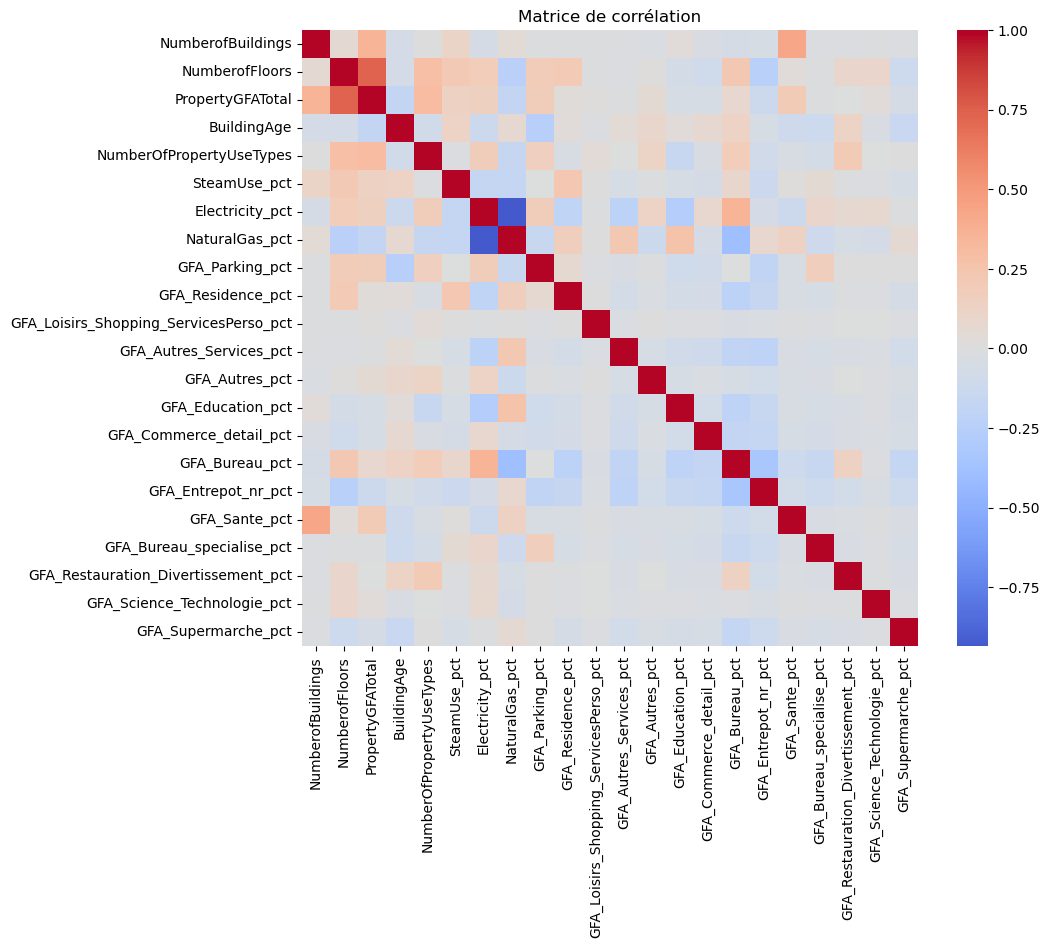

In [276]:
# Calcul de la matrice de corrélation
corr_matrix = X_train_scaled_df.corr()

# Création d'une heatmap avec seaborn
plt.figure(figsize=(10, 8))

sns.heatmap(corr_matrix, annot=False, fmt=".2f", cmap='coolwarm', cbar=True, square=True, center=0)

# Titre et affichage du graphique
plt.title('Matrice de corrélation')
plt.show()

### Tests de modèles

#### Data preparation

In [291]:
# Sélection des variables explicatives et des variables cibles
features = df_nrjstar.drop(['TotalGHGEmissions', 'SiteEnergyUseWN(kBtu)', 'Log_TotalGHGEmissions', 'Log_SiteEnergyUseWN',
                            'ENERGYSTARScore'], axis=1)
target = df_nrjstar['Log_TotalGHGEmissions']

# Transformation des variables catégorielles en variables numériques (encodage one-hot)
features = pd.get_dummies(features)

In [292]:
features.head(1)

NumberofBuildings  NumberofFloors  PropertyGFATotal  BuildingAge  \
0                1.0              12             88434           89   

   NumberOfPropertyUseTypes  SteamUse_pct  Electricity_pct  NaturalGas_pct  \
0                         1      26.87282        52.917723        17.11772   

   GFA_Parking_pct  GFA_Residence_pct  GFA_Loisirs_Shopping_ServicesPerso_pct  \
0              0.0              100.0                                     0.0   

   GFA_Autres_Services_pct  GFA_Autres_pct  GFA_Education_pct  \
0                      0.0             0.0                0.0   

   GFA_Commerce_detail_pct  GFA_Bureau_pct  GFA_Entrepot_nr_pct  \
0                      0.0             0.0                  0.0   

   GFA_Sante_pct  GFA_Bureau_specialise_pct  \
0            0.0                        0.0   

   GFA_Restauration_Divertissement_pct  GFA_Science_Technologie_pct  \
0                                  0.0                          0.0   

   GFA_Supermarche_pct  
0                  0.0

In [293]:
# Séparation des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Conservez les noms des colonnes dans une variable avant la mise à l'échelle
column_names = X_train.columns

# Affichage des dimensions des ensembles d'entraînement et de test
X_train.shape, X_test.shape

((580, 22), (145, 22))

In [294]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 580 entries, 638 to 146
Data columns (total 22 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   NumberofBuildings                       580 non-null    float64
 1   NumberofFloors                          580 non-null    int64  
 2   PropertyGFATotal                        580 non-null    int64  
 3   BuildingAge                             580 non-null    int64  
 4   NumberOfPropertyUseTypes                580 non-null    int64  
 5   SteamUse_pct                            580 non-null    float64
 6   Electricity_pct                         580 non-null    float64
 7   NaturalGas_pct                          580 non-null    float64
 8   GFA_Parking_pct                         580 non-null    float64
 9   GFA_Residence_pct                       580 non-null    float64
 10  GFA_Loisirs_Shopping_ServicesPerso_pct  580 non-null    float64
 

In [295]:
X_train.head()

NumberofBuildings  NumberofFloors  PropertyGFATotal  BuildingAge  \
638                1.0               3             39927           42   
7                  1.0              11            153163           47   
606                1.0               2             21128           57   
889                1.0               2             21200           18   
580                1.0               1             36444           56   

     NumberOfPropertyUseTypes  SteamUse_pct  Electricity_pct  NaturalGas_pct  \
638                         2      0.000000        93.117487        0.000000   
7                           1     31.460248        37.169778       27.583765   
606                         1      0.000000        99.999979        0.000000   
889                         2      0.000000       100.000000        0.000000   
580                         1      0.000000        95.188896        0.000000   

     GFA_Parking_pct  GFA_Residence_pct  \
638         0.000000           0.000000   
7          12.587244          87.412756   
606         0.000000           0.000000   
889         0.000000           0.000000   
580         0.000000           0.000000   

     GFA_Loisirs_Shopping_ServicesPerso_pct  GFA_Autres_Services_pct  \
638                                     0.0                      0.0   
7                                       0.0                      0.0   
606                                     0.0                      0.0   
889                                     0.0                      0.0   
580                                     0.0                      0.0   

     GFA_Autres_pct  GFA_Education_pct  GFA_Commerce_detail_pct  \
638        0.966764                0.0                 0.000000   
7          0.000000                0.0                 0.000000   
606        0.000000                0.0                 0.000000   
889        0.000000                0.0                66.830189   
580        0.000000                0.0                 0.000000   

     GFA_Bureau_pct  GFA_Entrepot_nr_pct  GFA_Sante_pct  \
638       99.033236                  0.0            0.0   
7          0.000000                  0.0            0.0   
606      100.000000                  0.0            0.0   
889       33.169811                  0.0            0.0   
580        0.000000                100.0            0.0   

     GFA_Bureau_specialise_pct  GFA_Restauration_Divertissement_pct  \
638                        0.0                                  0.0   
7                          0.0                                  0.0   
606                        0.0                                  0.0   
889                        0.0                                  0.0   
580                        0.0                                  0.0   

     GFA_Science_Technologie_pct  GFA_Supermarche_pct  
638                          0.0                  0.0  
7                            0.0                  0.0  
606                          0.0                  0.0  
889                          0.0                  0.0  
580                          0.0                  0.0

#### Standardisation

In [296]:
# Initialisation du StandardScaler
scaler = StandardScaler()

In [297]:
# Normalisation des ensembles d'entraînement et de test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Affichage des premières lignes des données normalisées pour vérification
X_train_scaled_df = pd.DataFrame(X_train_scaled, index=X_train.index, columns=column_names)
X_train_scaled_df.head(5)

NumberofBuildings  NumberofFloors  PropertyGFATotal  BuildingAge  \
638          -0.088885       -0.208439         -0.361989    -0.451947   
7            -0.088885        1.081104          0.228270    -0.292093   
606          -0.088885       -0.369632         -0.459982     0.027616   
889          -0.088885       -0.369632         -0.459607    -1.219248   
580          -0.088885       -0.530825         -0.380145    -0.004355   

     NumberOfPropertyUseTypes  SteamUse_pct  Electricity_pct  NaturalGas_pct  \
638                  0.517505     -0.234397         0.924016       -1.052039   
7                   -0.722797      3.420266        -1.120001        0.107293   
606                 -0.722797     -0.234397         1.175463       -1.052039   
889                  0.517505     -0.234397         1.175464       -1.052039   
580                 -0.722797     -0.234397         0.999693       -1.052039   

     GFA_Parking_pct  GFA_Residence_pct  \
638        -0.359810          -0.281954   
7           1.017538           3.546663   
606        -0.359810          -0.281954   
889        -0.359810          -0.281954   
580        -0.359810          -0.281954   

     GFA_Loisirs_Shopping_ServicesPerso_pct  GFA_Autres_Services_pct  \
638                               -0.065082                -0.379602   
7                                 -0.065082                -0.379602   
606                               -0.065082                -0.379602   
889                               -0.065082                -0.379602   
580                               -0.065082                -0.379602   

     GFA_Autres_pct  GFA_Education_pct  GFA_Commerce_detail_pct  \
638       -0.147786          -0.268631                -0.327182   
7         -0.238341          -0.268631                -0.327182   
606       -0.238341          -0.268631                -0.327182   
889       -0.238341          -0.268631                 2.418859   
580       -0.238341          -0.268631                -0.327182   

     GFA_Bureau_pct  GFA_Entrepot_nr_pct  GFA_Sante_pct  \
638        1.679813            -0.554327      -0.149799   
7         -0.787685            -0.554327      -0.149799   
606        1.703901            -0.554327      -0.149799   
889        0.038770            -0.554327      -0.149799   
580       -0.787685             2.050971      -0.149799   

     GFA_Bureau_specialise_pct  GFA_Restauration_Divertissement_pct  \
638                  -0.203529                            -0.151915   
7                    -0.203529                            -0.151915   
606                  -0.203529                            -0.151915   
889                  -0.203529                            -0.151915   
580                  -0.203529                            -0.151915   

     GFA_Science_Technologie_pct  GFA_Supermarche_pct  
638                    -0.064673            -0.216399  
7                      -0.064673            -0.216399  
606                    -0.064673            -0.216399  
889                    -0.064673            -0.216399  
580                    -0.064673            -0.216399

#### Test multi modèles

In [298]:
# Liste de modèles à évaluer
models = [
    ('DummyRegressorMedian', DummyRegressor(strategy='median')),
    ('LinearRegression', LinearRegression()),
    ('Ridge', Ridge()),
    ('Lasso', Lasso()),
    ('ElasticNet', ElasticNet(random_state=0)),
    ('RandomForest', RandomForestRegressor(random_state=0)),
    ('GradientBoostingReg', GradientBoostingRegressor(random_state=0)),
    ('XGBoostReg', XGBRegressor(random_state=0)),
    ('SVR', SVR()),
    ('AdaBoostReg', AdaBoostRegressor(random_state=0))
]

# Tableau pour collecter les résultats
results = []

# Évaluer chaque modèle
for name, model in models:
    # Entraîner le modèle
    start_time = time.time() 
    model.fit(X_train_scaled, y_train)
    end_time = time.time()  # Enregistre le temps de fin
    duration = end_time - start_time  # Calcule la durée
    
    # Prédire sur l'ensemble de test
    y_pred = model.predict(X_test_scaled)
    
    # Calculer les métriques
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # RMSE CV
    scores_rmse = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
    rmse_cv = np.sqrt(-scores_rmse).mean()
    
    # R2 CV
    scores_r2 = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='r2')
    r2_cv = scores_r2.mean()
    r2_cv_std = scores_r2.std() 
    
    results.append((name, rmse, mae, r2, rmse_cv, r2_cv, r2_cv_std, duration))


In [299]:
# Convertir les résultats en DataFrame
df_results = pd.DataFrame(results, columns=['Modèle', 'RMSE', 'MAE', 'R2', 'RMSE CV', 'R2 CV', 'R2 CV Std', 'Temps de calcul'])
df_sorted_by_performance = df_results.sort_values(by=['R2 CV'], ascending=[False])

df_sorted_by_performance

Modèle      RMSE       MAE        R2   RMSE CV     R2 CV  \
6   GradientBoostingReg  0.487167  0.364059  0.888391  0.519822  0.863974   
5          RandomForest  0.533220  0.392420  0.866293  0.542859  0.851411   
7            XGBoostReg  0.550586  0.398839  0.857441  0.560563  0.842251   
9           AdaBoostReg  0.647716  0.506685  0.802707  0.631648  0.800531   
8                   SVR  0.637883  0.499485  0.808651  0.719721  0.740280   
2                 Ridge  0.724749  0.558886  0.752988  0.769123  0.703077   
1      LinearRegression  0.718754  0.555607  0.757057  0.770199  0.701895   
4            ElasticNet  1.340634  1.090714  0.154792  1.329902  0.118789   
0  DummyRegressorMedian  1.470226  1.191180 -0.016509  1.431848 -0.021318   
3                 Lasso  1.465834  1.188272 -0.010445  1.432835 -0.022959   

   R2 CV Std  Temps de calcul  
6   0.025247         0.146540  
5   0.032111         0.449356  
7   0.027614         0.078017  
9   0.021096         0.077521  
8   0.030225         0.013003  
2   0.053559         0.001000  
1   0.058519         0.001000  
4   0.019508         0.001000  
0   0.017727         0.001000  
3   0.023366         0.000000

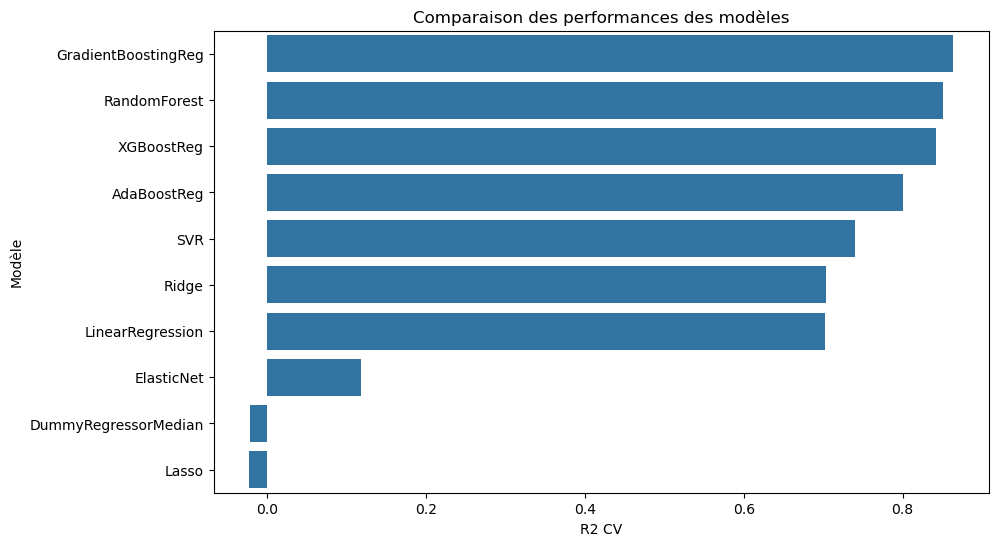

In [300]:
plt.figure(figsize=(10, 6))
sns.barplot(x='R2 CV', y='Modèle', data=df_sorted_by_performance)
plt.title('Comparaison des performances des modèles')
plt.show()

Les modèles Gradient Boosting Regressor est nettement supérieur aux autres si on regarde le R² avec CV.

### Optimisation du GradientBoostingReg

#### Le modèle de base

In [301]:
# Création du modèle Gradient Boosting
gb_model = GradientBoostingRegressor()

# Entraînement du modèle sur les données d'entraînement
gb_model.fit(X_train_scaled, y_train)

# Prédiction sur le jeu de test
y_pred_gb = gb_model.predict(X_test_scaled)

# Calcul des métriques pour le meilleur modèle
rmse_base = np.sqrt(mean_squared_error(y_test, y_pred_gb))
r2_base = r2_score(y_test, y_pred_gb)
mae_base = mean_absolute_error(y_test, y_pred_gb)

print("Métriques pour le modèle GBR :")
print("RMSE :", rmse_base)
print("R² :", r2_base)
print("MAE :", mae_base)

Métriques pour le modèle GBR :
RMSE : 0.4877142803548039
R² : 0.8881402234362427
MAE : 0.3652645326484994


In [302]:
importances_gb = gb_model.feature_importances_

# Création d'un DataFrame pour afficher l'importance des variables
features_gb = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances_gb})
features_gb = features_gb.sort_values(by='Importance', ascending=False)

# Tri des caractéristiques par importance croissante
features_gb = features_gb.sort_values('Importance', ascending=False)

print(features_gb)

                                   Feature  Importance
2                         PropertyGFATotal    0.447164
6                          Electricity_pct    0.305295
16                     GFA_Entrepot_nr_pct    0.064512
7                           NaturalGas_pct    0.057211
21                     GFA_Supermarche_pct    0.042688
1                           NumberofFloors    0.017285
0                        NumberofBuildings    0.014368
20             GFA_Science_Technologie_pct    0.011986
11                 GFA_Autres_Services_pct    0.009831
3                              BuildingAge    0.008412
5                             SteamUse_pct    0.006128
17                           GFA_Sante_pct    0.005841
14                 GFA_Commerce_detail_pct    0.002276
9                        GFA_Residence_pct    0.001520
18               GFA_Bureau_specialise_pct    0.001280
12                          GFA_Autres_pct    0.001084
13                       GFA_Education_pct    0.001070
8         

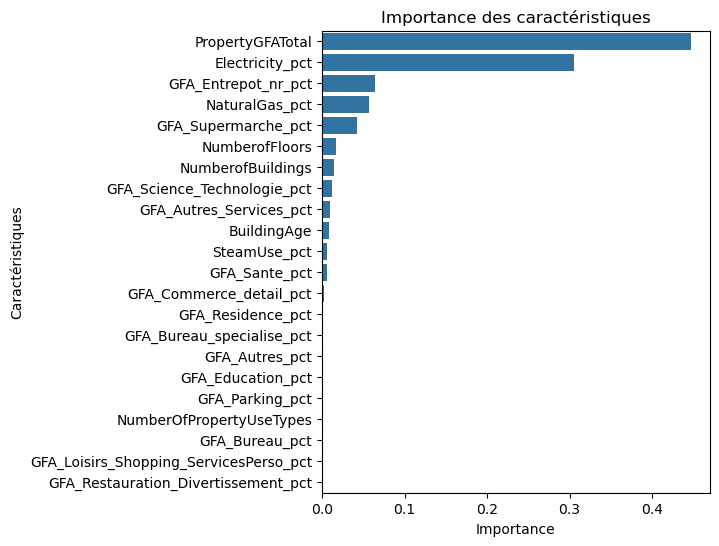

In [303]:
plt.figure(figsize=(5, 6))
sns.barplot(x="Importance", y="Feature", data=features_gb)
plt.title('Importance des caractéristiques')
plt.xlabel('Importance')
plt.ylabel('Caractéristiques')
plt.show()

#### Recherche des hyperparamètres

In [304]:
# Définition des hyperparamètres à tester
param_dist = {
    'n_estimators': np.arange(50, 500, 10),
    'learning_rate': np.linspace(0.008, 0.2, 20),
    'max_depth': np.arange(2, 10, 1),
    'min_samples_split': np.arange(2, 10, 1),
    'min_samples_leaf': np.arange(1, 5, 1),
    'subsample': np.linspace(0.3, 0.9, 20)
}

# Initialisation de la recherche aléatoire
random_search = RandomizedSearchCV(GradientBoostingRegressor(), param_distributions=param_dist, n_iter=100, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Exécution de la recherche aléatoire sur le jeu d'entraînement
random_search.fit(X_train_scaled, y_train)

# Récupération du meilleur modèle
best_gb_model = random_search.best_estimator_

# Affichage des meilleurs paramètres et du meilleur score
print("Meilleurs hyperparamètres (RandomizedSearchCV) pour GBR: ", random_search.best_params_)
meilleur_score_rmse_bgr = np.sqrt(-random_search.best_score_) 
print("Meilleur score (RMSE) pour GBR: ", meilleur_score_rmse_bgr)

Meilleurs hyperparamètres (RandomizedSearchCV) pour GBR:  {'subsample': 0.3, 'n_estimators': 270, 'min_samples_split': 7, 'min_samples_leaf': 2, 'max_depth': 5, 'learning_rate': 0.028210526315789474}
Meilleur score (RMSE) pour GBR:  0.5019505962377172


In [305]:
# Définition de la grille d'hyperparamètres
param_grid = {
    'learning_rate': [0.49, 0.5],
    'max_depth': [3, 4, 5],
    'min_samples_leaf': [1, 2],
    'min_samples_split': [7, 8, 9],
    'n_estimators': [110, 170, 270],
    'subsample': [0.3, 0.4, 0.6]
}

# Configuration de GridSearchCV
grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)

# Exécution de la recherche d'hyperparamètres
grid_search.fit(X_train_scaled, y_train)

# Affichage des meilleurs paramètres
print("Meilleurs paramètres :", grid_search.best_params_)

# Prédiction avec le meilleur modèle
y_pred = grid_search.best_estimator_.predict(X_test_scaled)

# Calcul des métriques pour le meilleur modèle
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
smape = 100 * np.mean(2 * np.abs(y_pred - y_test) / (np.abs(y_pred) + np.abs(y_test)))

print("RMSE avec GridSearchCV pour GBR: {:.4f}".format(rmse))
print("MAE avec GridSearchCV pour GBR: {:.4f}".format(mae))
print("R2 avec GridSearchCV pour GBR: {:.4f}".format(r2))
print("SMAPE avec GridSearchCV pour GBR: {:.4f}%".format(smape))


Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Meilleurs paramètres : {'learning_rate': 0.5, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 8, 'n_estimators': 110, 'subsample': 0.6}
RMSE avec GridSearchCV pour GBR: 0.5807
MAE avec GridSearchCV pour GBR: 0.4485
R2 avec GridSearchCV pour GBR: 0.8414
SMAPE avec GridSearchCV pour GBR: 14.9547%


In [306]:
# Meilleurs hyperparamètres obtenus de GridSearchCV
best_paramsse = grid_search.best_params_

# Configuration du modèle avec les meilleurs hyperparamètres
best_gb_modelse = GradientBoostingRegressor(
    n_estimators=best_paramsse['n_estimators'],
    learning_rate=best_paramsse['learning_rate'],
    max_depth=best_paramsse['max_depth'],
    min_samples_split=best_paramsse['min_samples_split'],
    min_samples_leaf=best_paramsse['min_samples_leaf'],
    subsample=best_paramsse['subsample'],
    random_state=0
)

# Métriques à évaluer lors de la validation croisée
scoring_metrics = ['neg_mean_squared_error', 'r2', 'neg_mean_absolute_error']

# Exécution de la validation croisée (5 plis)
cv_results = cross_validate(best_gb_model, X_train_scaled, y_train, cv=5, scoring=scoring_metrics, return_train_score=True)

# Calcul et affichage des métriques moyennes pour chaque pli
rmsese_scores = np.sqrt(-cv_results['test_neg_mean_squared_error'])
r2se_scores = cv_results['test_r2']
maese_scores = -cv_results['test_neg_mean_absolute_error']

# Affichage avec écart type
print(f"Validation Croisée RMSE: {rmsese_scores.mean():.4f} (± {rmsese_scores.std():.4f})")
print(f"Validation Croisée MAE: {maese_scores.mean():.4f} (± {maese_scores.std():.4f})")
print(f"Validation Croisée R²: {r2se_scores.mean():.4f} (± {r2se_scores.std():.4f})")

Validation Croisée RMSE: 0.4983 (± 0.0472)
Validation Croisée MAE: 0.3856 (± 0.0312)
Validation Croisée R²: 0.8748 (± 0.0244)


In [307]:
best_gb_modelse.fit(X_train_scaled, y_train) 

# Prédictions sur l'ensemble d'entraînement
y_train_predse = best_gb_modelse.predict(X_train_scaled)

# Prédictions sur l'ensemble de test
y_test_predse = best_gb_modelse.predict(X_test_scaled)

# Calcul des métriques pour l'ensemble d'entraînement
train_rmsese = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_r2se = r2_score(y_train, y_train_pred)
train_maese = mean_absolute_error(y_train, y_train_pred)

# Calcul des métriques pour l'ensemble de test
test_rmsese = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_r2se = r2_score(y_test, y_test_pred)
test_maese = mean_absolute_error(y_test, y_test_pred)

# Affichage des métriques
print("Ensemble d'entraînement : RMSE = {:.4f}, R² = {:.4f}, MAE = {:.4f}".format(train_rmsese, train_r2, train_mae))
print("Ensemble de test : RMSE = {:.4f}, R² = {:.4f}, MAE = {:.4f}".format(test_rmsese, test_r2, test_mae))

Ensemble d'entraînement : RMSE = 0.2325, R² = 0.9735, MAE = 0.1837
Ensemble de test : RMSE = 0.3634, R² = 0.9379, MAE = 0.2807


### Analyse des erreurs

#### Avec les cibles en log

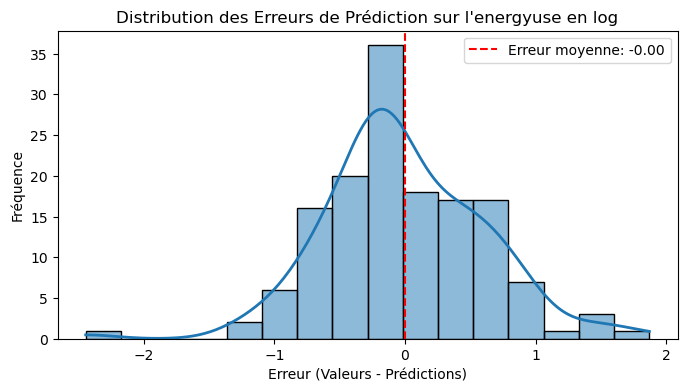

In [308]:
# Calcul des erreurs
errors = y_test - y_test_predse

# Calcul de l'erreur moyenne
mean_error = np.mean(errors)

# Visualisation de la distribution des erreurs
# Couleurs de la palette tab10
colors_tab10 = plt.cm.tab10(np.arange(10))
plt.figure(figsize=(8, 4))
sns.histplot(errors, kde=True, color=colors_tab10[0], line_kws={'color': colors_tab10[1], 'linewidth': 2})
plt.axvline(mean_error, color='red', linestyle='--', label=f'Erreur moyenne: {mean_error:.2f}')
plt.title('Distribution des Erreurs de Prédiction sur l\'energyuse en log')
plt.xlabel('Erreur (Valeurs - Prédictions)')
plt.ylabel('Fréquence')
plt.legend()

plt.show()

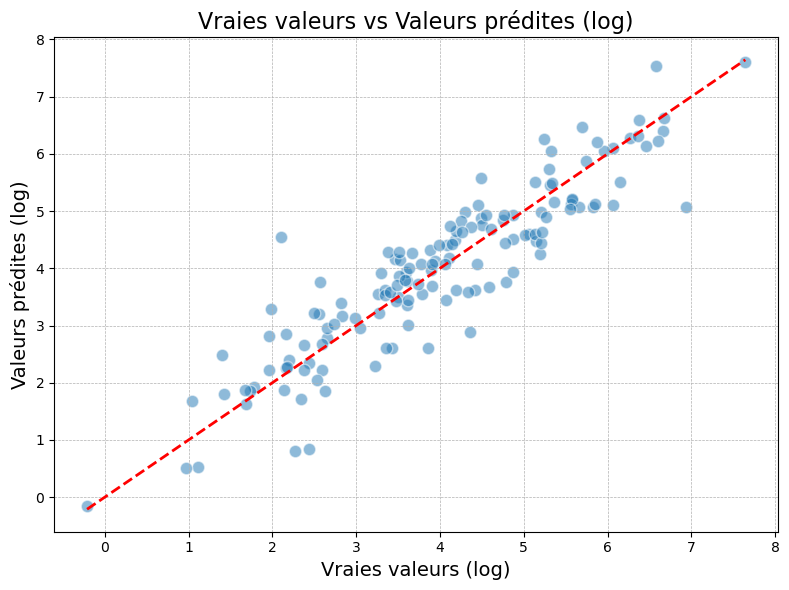

In [309]:
plt.figure(figsize=(8, 6))  # Augmenter la taille du graphique
plt.scatter(y_test, y_test_predse, alpha=0.5, edgecolors='w', s=80)  # Ajouter des bords blancs pour mieux distinguer les points superposés
plt.title('Vraies valeurs vs Valeurs prédites (log)', fontsize=16)
plt.xlabel('Vraies valeurs (log)', fontsize=14)
plt.ylabel('Valeurs prédites (log)', fontsize=14)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2, linestyle='--')  # Ligne y=x
plt.grid(True, which='major', linestyle='--', linewidth=0.5)  # Grille plus fine
plt.grid(True, which='minor', linestyle=':', linewidth=0.5, alpha=0.7)  # Grille mineure
plt.tight_layout() 
plt.show()


#### Avec les valeurs réelles

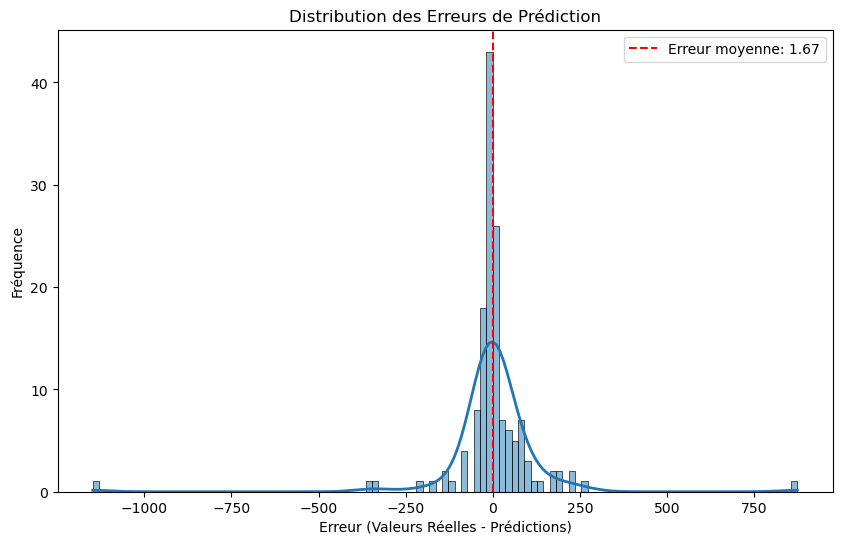

In [310]:
# Conversion des prédictions et des valeurs réelles de test de log à l'échelle originale
y_test_pred_originalse = np.exp(y_test_predse) 
y_test_originalse = np.exp(y_test)  

# Calcul des erreurs
errorsse = y_test_originalse - y_test_pred_originalse

# Calcul de l'erreur moyenne
mean_error = np.mean(errorsse)

# Visualisation de la distribution des erreurs
plt.figure(figsize=(10, 6))
sns.histplot(errorsse, kde=True, color=colors_tab10[0], line_kws={'color': colors_tab10[1], 'linewidth': 2})
plt.axvline(mean_error, color='red', linestyle='--', label=f'Erreur moyenne: {mean_error:.2f}')
plt.title('Distribution des Erreurs de Prédiction')
plt.xlabel('Erreur (Valeurs Réelles - Prédictions)')
plt.ylabel('Fréquence')
plt.legend()

plt.show()

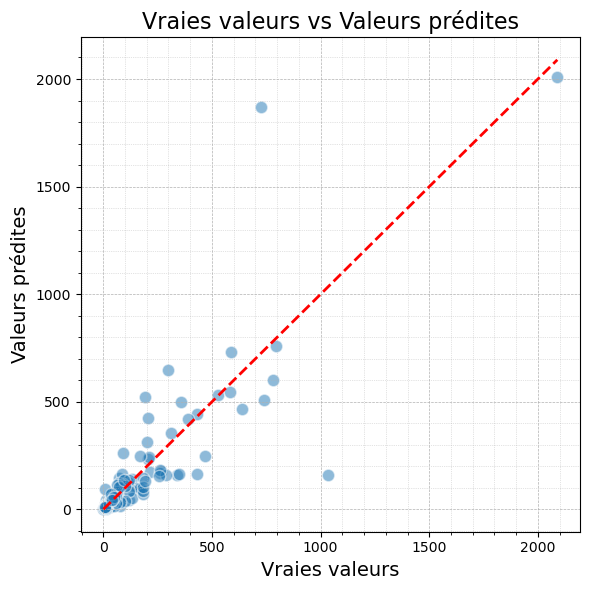

In [311]:
plt.figure(figsize=(6, 6)) 
plt.scatter(y_test_original, y_test_pred_originalse, alpha=0.5, edgecolors='w', s=80)  
plt.title('Vraies valeurs vs Valeurs prédites', fontsize=16)
plt.xlabel('Vraies valeurs', fontsize=14)
plt.ylabel('Valeurs prédites', fontsize=14)
plt.plot([min(y_test_original), max(y_test_original)], [min(y_test_original), max(y_test_original)], color='red', lw=2, linestyle='--')  # Ligne y=x
plt.grid(True, which='major', linestyle='--', linewidth=0.5) 
plt.minorticks_on() 
plt.grid(True, which='minor', linestyle=':', linewidth=0.5, alpha=0.7) 
plt.tight_layout() 
plt.show()

In [312]:
# Création d'un DataFrame avec les valeurs réelles et prédites
df_errors = pd.DataFrame({'Valeurs réelles': y_test_originalse, 'Valeurs prédites': y_test_pred_originalse})


# Calcul des erreurs absolues et ajout en tant que nouvelle colonne
df_errors['Erreurs absolues'] = abs(df_errors['Valeurs réelles'] - df_errors['Valeurs prédites'])

# Trier le DataFrame par les erreurs absolues de façon décroissante
df_errors_sorted = df_errors.sort_values('Erreurs absolues', ascending=False)

# Afficher les 15 erreurs les plus grandes
print(df_errors_sorted.head(15))

      Valeurs réelles  Valeurs prédites  Erreurs absolues
65             723.47       1871.622347       1148.152347
202           1032.63        158.870417        873.759583
73             297.43        647.315795        349.885795
394            189.85        524.419682        334.569682
128            429.27        165.492475        263.777525
141            741.30        508.358399        232.941601
95             469.57        247.616152        221.953848
1019           206.33        424.215542        217.885542
13             349.32        166.887928        182.432072
104            780.84        599.260902        181.579098
145            337.97        158.141725        179.828275
133             89.47        263.220451        173.750451
350            639.72        466.882726        172.837274
153            588.90        730.951905        142.051905
476            355.80        497.641103        141.841103


In [313]:
indices_plus_gd_erreurs = df_errors_sorted.head(15).index
df_top_errors = df.loc[indices_plus_gd_erreurs]
df_top_errors

NumberofBuildings  NumberofFloors  PropertyGFATotal  ENERGYSTARScore  \
65                  1.0               1            530039             98.0   
202                 1.0               7            351530             23.0   
73                  1.0               1            234144             87.0   
394                 1.0               6            320946             57.0   
128                 1.0              63           1354987             89.0   
141                 1.0              42            304346             72.0   
95                  1.0              16            106860             49.0   
1019                1.0               1             33706             22.0   
13                  1.0              10            104352             39.0   
104                 1.0               8            254273             29.0   
145                 1.0              42            635824             69.0   
133                 1.0               2             89200             83.0   
350                 1.0              27            216571             62.0   
153                 1.0              55           1400000             92.0   
476                 1.0               9            104000              8.0   

      SiteEnergyUseWN(kBtu)  TotalGHGEmissions  BuildingAge  \
65               28763498.0             723.47           65   
202              43178016.0            1032.63           16   
73                7874958.5             297.43           79   
394              25585012.0             189.85          106   
128              61576184.0             429.27           26   
141              24880988.0             741.30          104   
95               12616417.0             469.57           85   
1019              8992072.0             206.33           18   
13               10154608.0             349.32          100   
104              26831896.0             780.84           13   
145              48479988.0             337.97           40   
133               6707359.5              89.47           38   
350              17352520.0             639.72           87   
153              55140300.0             588.90           28   
476               9037184.0             355.80           91   

      NumberOfPropertyUseTypes  SteamUse_pct  Electricity_pct  NaturalGas_pct  \
65                           2      0.000000        56.406662       39.955165   
202                          1      0.000000        62.026685       36.888513   
73                           1      0.000000        16.721574       68.920998   
394                          2      0.000000        98.515037        1.040539   
128                          2      0.000000        99.999994        0.000000   
141                          4      4.077098        45.174026       44.242926   
95                           1      0.000000        28.231010       66.373646   
1019                         1      0.000000        61.481892       35.133104   
13                           1     33.786257        58.184127        8.029616   
104                          1      0.000000        51.295451       48.061084   
145                          5      0.000000        99.999988        0.000000   
133                          1      0.000000        81.986436       14.354546   
350                          3     42.725126        50.164310        0.734458   
153                          4      3.952622        89.721733        2.587654   
476                          2     39.598046        46.030069       10.537320   

      GFA_Parking_pct  GFA_Residence_pct  \
65           0.000000           0.000000   
202         41.101522           0.000000   
73           0.000000           0.000000   
394          0.000000           0.000000   
128         10.438400           0.000000   
141          0.000000           0.000000   
95           0.000000         100.000000   
1019         0.000000           0.000000   
13           0.000000         100.000000   
104        

In [314]:
# Initialiser l'explainer SHAP
explainer = shap.TreeExplainer(best_gb_model)

# Calculer les valeurs SHAP pour l'ensemble d'entraînement
shap_values = explainer.shap_values(X_test_scaled)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


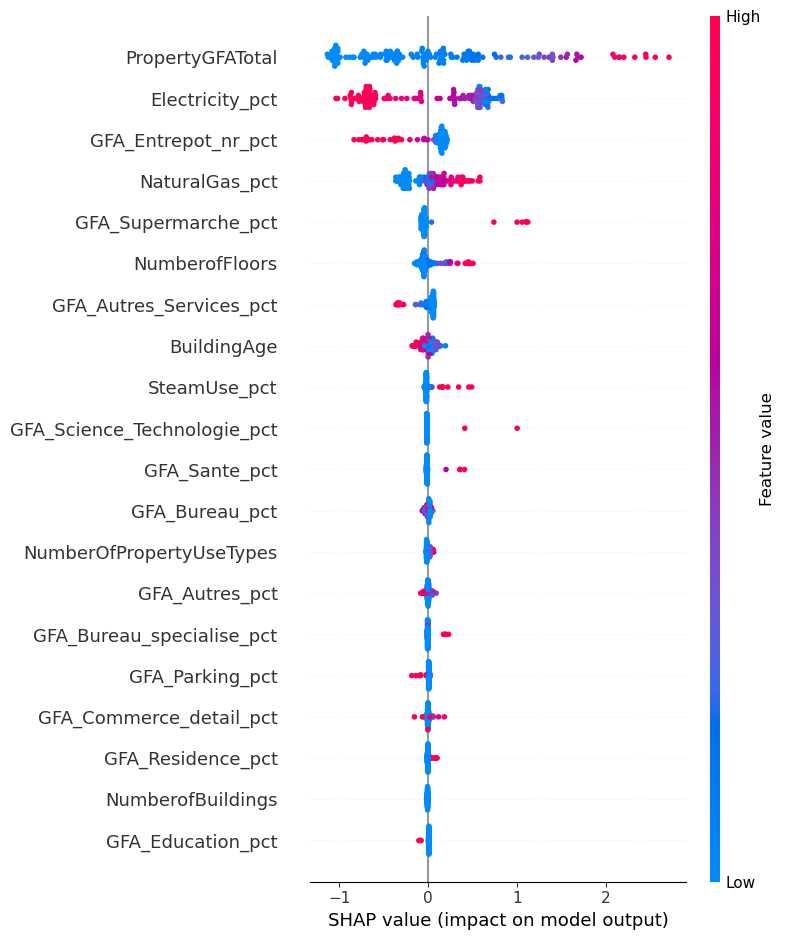

In [315]:
# Résumé de l'importance des caractéristiques
shap.summary_plot(shap_values, X_test_scaled, feature_names=X_test.columns)

# Comparaison 

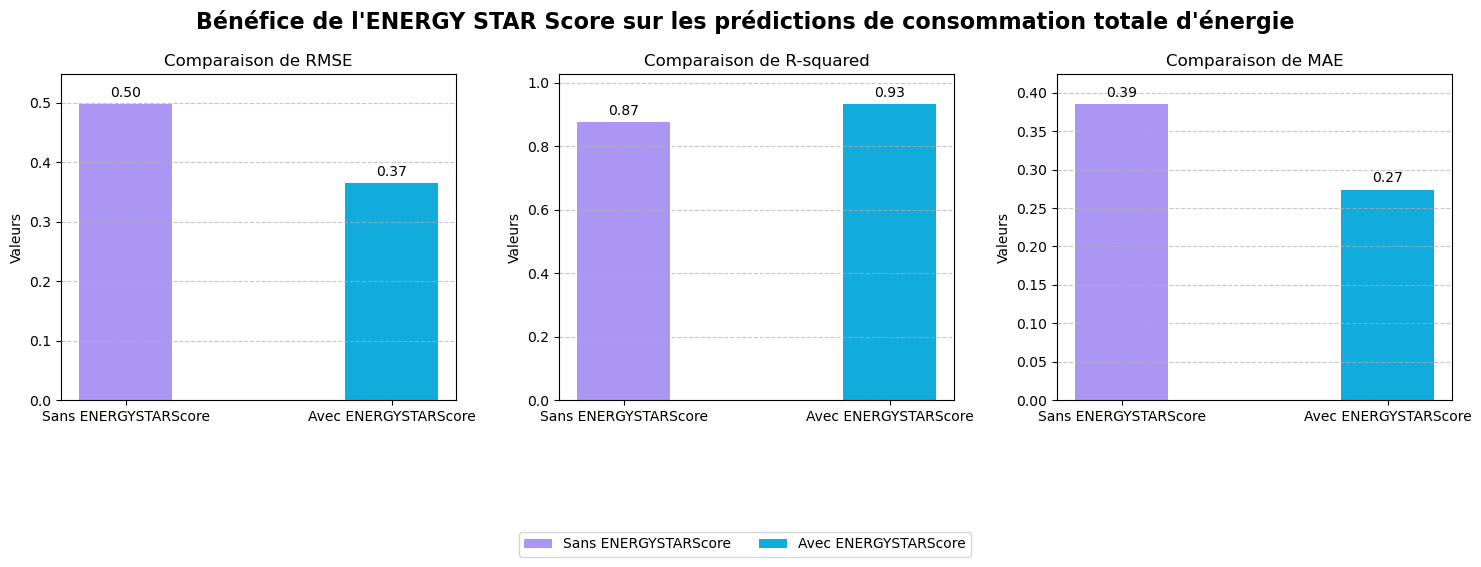

In [316]:
# Noms des métriques
metric_names = ['RMSE', 'R-squared', 'MAE']

metrics_gb_ESS = [np.mean(rmse_scores), np.mean(r2_scores), np.mean(mae_scores), np.nan]  
metrics_gb = [np.mean(rmsese_scores), np.mean(r2se_scores), np.mean(maese_scores), np.nan] 

# Largeur des barres
width = 0.35

# Création d'une ligne de trois graphiques
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # Ajustement pour une ligne de trois graphiques

for i, ax in enumerate(axes):
    metric_name = metric_names[i]
    bars1 = ax.bar(0, metrics_gb[i], width, color='#AB97F3') 
    bars2 = ax.bar(1, metrics_gb_ESS[i], width, color='#12ACDC')
    
    # Ajout des étiquettes, titres et grilles
    ax.set_ylabel('Valeurs')
    ax.set_title(f'Comparaison de {metric_name}')
    ax.set_xticks([0, 1])
    ax.set_xticklabels(['Sans ENERGYSTARScore', 'Avec ENERGYSTARScore'])
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Ajuster les limites de l'axe des y pour laisser plus d'espace au-dessus des barres
    ax.set_ylim(0, max(metrics_gb[i], metrics_gb_ESS[i]) * 1.1)  # Ajout de 10% de marge au-dessus des barres pour lisibilité
    
    # Ajout des valeurs sur les barres pour améliorer la lisibilité
    for bar in [bars1, bars2]:
        for rect in bar:
            height = rect.get_height()
            ax.annotate(f'{height:.2f}',
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points de décalage vertical
                        textcoords="offset points",
                        ha='center', va='bottom')

# Ajuster la légende et le titre général
fig.legend([bars1, bars2], ['Sans ENERGYSTARScore', 'Avec ENERGYSTARScore'], loc='upper center', ncol=2, bbox_to_anchor=(0.5, -0.05))

fig.suptitle("Bénéfice de l'ENERGY STAR Score sur les prédictions de consommation totale d'énergie", fontsize=16, fontweight='bold')

plt.tight_layout()
plt.subplots_adjust(bottom=0.2)  # Ajustement de l'espacement pour la légende

plt.show()